In [1]:
import configparser
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, \
                        Input, Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from collections import Counter
import keras.optimizers
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import glob, os
import tensorflow as tf
import pandas as pd
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s
from pycausal.pycausal import pycausal as pc
from collections import defaultdict
from numpy.polynomial.polynomial import polyfit  
from scipy.stats import pearsonr
from pylab import text
from pycausal import prior as p
import itertools

# select your GPU Here
os.environ["CUDA_VISIBLE_DEVICES"]="1" #Comment this line out if you want all GPUS (2 hehe)

# python full-display web browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def get_model(dense, dropouts, inputs):
    # dense is an ordered list of the number of dense neurons like [1024, 2048, 1024]
    # dropouts is an ordered list of the dropout masks like [0.2, 0.3, 0.4]
    inputs = keras.Input(shape = (inputs,))
    x = keras.layers.Dense(dense[0], activation = 'relu')(inputs)
    x = keras.layers.Dropout(dropouts[0])(x, training=False)
    for den, drop in zip(dense[1:], dropouts[1:]):
        x = keras.layers.Dense(den, activation = 'relu')(x)
        x = keras.layers.Dropout(drop)(x, training=False)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)
    model = keras.Model(inputs, outputs)
    return model



def get_bic(df, prior, penalty = 2):

    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True, penalty = 200
              )

    
    BIC = tetrad.getTetradGraph().getAllAttributes().toString()
    BIC = float(BIC.split('=')[-1].split('}')[0])
    return BIC #/ len(df)

def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))
def make_categorical(df, complete_df, categoricals):   
    retval = None
    for key in df.columns:
        if retval is not None:
            if key in categoricals:
                retval = np.concatenate((retval, to_categorical(df[key], len(complete_df[key].unique()))), axis = 1)
            else:
                retval = np.concatenate((retval, df[key].values[...,np.newaxis]), axis = 1)
        else:
            if key in categoricals:
                retval = to_categorical(df[key], len(complete_df[key].unique()))
            else:
                retval = df[key]
    return retval
num_models = 100
pc = pc()
pc.start_vm(java_max_heap_size = '21000M')
tetrad = s.tetradrunner()

models = []
model_names = []



randomize = False
if randomize:
    layers = [256, 512, 1024, 2048, 4096]
    for i in range(num_models):
        network = []
        for j in range(3):
            network.append(layers[random.randint(0,len(layers) -1)])
        models.append(network)
        model_names.append('temp/10sim' + str(i))
    print(models, model_names)    
else:
    model_layers = [512, 256]
    for i in range(num_models):
        models.append(model_layers)
        model_names.append('temp/10sim' + str(i))

print(models, model_names)

/home/tkyono/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [51

In [2]:
import networkx as nx

def random_dag(nodes, edges):
    """Generate a random Directed Acyclic Graph (DAG) with a given number of nodes and edges."""
    G = nx.DiGraph()
    for i in range(nodes):
        G.add_node(i)
    while edges > 0:
        a = random.randint(0,nodes-1)
        b=a
        while b==a:
            b = random.randint(0,nodes-1)
        G.add_edge(a,b)
        if nx.is_directed_acyclic_graph(G):
            edges -= 1
        else:
            # we closed a loop!
            G.remove_edge(a,b)
    return G



In [3]:
import pydot
from IPython.display import SVG

def examine_graph_continuous(df, prior = None):
    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
               )
    return tetrad.getTetradGraph()

def gen_data1(list_vertex = [], list_edges = [], mean = 0, var = 1, SIZE = 20000, perturb = []):
    g = []
    for v in list_vertex:
        if v in perturb:
            g.append(np.random.normal(mean,var,SIZE))
            print("perturbing ", v, "with meanm var = ", mean, var)
        else:
            g.append(np.random.normal(0,1,SIZE))
        
    for edge in list_edges:
        g[edge[1]] += g[edge[0]]
    g = np.swapaxes(g,0,1)
    return pd.DataFrame(g, columns = list(map(str, list_vertex)))

def gen_data2(list_vertex = [], list_edges = [], mean = 0, var = 1, SIZE = 20000):
    g = []
    for v in list_vertex:
        g.append(np.random.normal(mean,var,SIZE))

        
    for edge in list_edges:
        g[edge[1]] += g[edge[0]]
    g = np.swapaxes(g,0,1)
    return pd.DataFrame(g, columns = list(map(str, list_vertex)))


In [4]:

bestMSE = []
bestBIC = []
bestCOMBO = []
bestWRONG = []
bestPOSSIBLE= []
worstMSE = []
worstBIC = []
worstCOMBO = []
worstWRONG = []
worstPOSSIBLE= []

qbestMSE = []
qbestBIC = []
qbestCOMBO = []
qbestWRONG = []
qbestPOSSIBLE= []
qworstMSE = []
qworstBIC = []
qworstCOMBO = []
qworstWRONG = []
qworstPOSSIBLE= []


sbestMSE = []
sbestBIC = []
sbestCOMBO = []
sbestWRONG = []
sbestPOSSIBLE= []
sworstMSE = []
sworstBIC = []
sworstCOMBO = []
sworstWRONG = []
sworstPOSSIBLE= []

sqbestMSE = []
sqbestBIC = []
sqbestCOMBO = []
sqbestWRONG = []
sqbestPOSSIBLE= []
sqworstMSE = []
sqworstBIC = []
sqworstCOMBO = []
sqworstWRONG = []
sqworstPOSSIBLE= []

averageDegree = []
targetDegree = []
target_inD = []
target_outD = []
descendants = []
graphDiff = []

In [9]:

t= 0
while (t < 50):
    train_size = 10000
    nodes = 10
    test_mean = 1
    test_var = 2
    test_size = 2000
    
    
    w_G = random_dag(nodes, random.randint(0, 25)) # since max number of edges is n^2
    require = []
    for i in w_G.edges:
        require.append([str(i[0]), str(i[1])])  
    w_prior = p.knowledge(requiredirect = require)

    
    G = random_dag(nodes, random.randint(9, 18)) # since max number of edges is n^2
    df = gen_data2(np.arange(nodes), G.edges, SIZE = train_size)
    require = []
    for i in G.edges:
        require.append([str(i[0]), str(i[1])])  
    prior = p.knowledge(requiredirect = require)
    examine_graph_continuous(df, prior)
    
    
    
    # Check to make sure that graph matches our prior knowledge. Or else abort this test.
    a = set()
    for i in tetrad.getEdges():
        a.add((i[0], i[-1]))
    b = set()
    for i in require:
        b.add((i[0], i[1]))
    print("A = ", a)
    print("B = ", b)
    if a != b:
        continue

        # Need to set our inputs and outputs
    inputs = set(np.arange(nodes))
    #target = str(a.pop()[random.randint(0,1)])
    target = str([x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)>=1][0])
    inputs.remove(int(target))
    inputs = list(map(str, inputs))
    
    perturb = int(inputs[random.randint(0,nodes - 2)])
    df_test = gen_data2(np.arange(nodes), G.edges, mean = test_mean, var = test_var, SIZE = test_size)
    sdf_test = gen_data1(np.arange(nodes), G.edges, mean = test_mean, var = test_var, SIZE = test_size, perturb = [perturb])
    target = [target]
    
    print("Inputs = ", inputs)
    print("Target = ", target)
    
    x_test = df_test[inputs]
    y_test = df_test[target]
    
    sx_test = sdf_test[inputs]
    sy_test = sdf_test[target]

    causal_split = 0.2
    val_split = 0.2
    train_split = 1 - (causal_split + val_split)

    x_causal = df[inputs][-int(causal_split * len(df)) :]
    y_causal = df[target][-int(causal_split * len(df)) :]

    x_val = df[inputs][int(train_split * len(df)):-int(causal_split * len(df))]
    y_val = df[target][int(train_split * len(df)):-int(causal_split * len(df))]

    x_train = df[inputs][:int(train_split * len(df))]
    y_train = df[target][:int(train_split * len(df))]

    verbosity = 0

    for idx, model_name in enumerate(model_names):
        if idx % 10 == 0:
            print(idx)
        if type(models[idx]) is list:
            #clear session
            keras.backend.clear_session() 
            #get model according to specification
            model = get_model(models[idx], [0.4] * len(models), np.shape(x_train)[1])
            callbacks = [ModelCheckpoint(model_name, verbose= verbosity, monitor='val_loss',save_best_only=True), 
                         EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose= verbosity, mode='auto')]
            model.compile(optimizer = optimizers.SGD(lr = 0.0001, momentum = 0.9, ), loss='mean_squared_error', metrics = ['mse'])
            #print(len(X), len(y))
            model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val), callbacks = callbacks, batch_size = 32, verbose = verbosity)
        else:
            models[idx].fit(X,y)





    generalization = []
    metrics = []
    proposed = []
    w_proposed = []
    x_causal.reset_index(drop=True, inplace = True)
    for idx, model_name in enumerate(model_names):
        #print(model_name)
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]

        y_pred = model.predict(x_test)
        generalization.append(mean_squared_error(y_pred, y_test))

        #### CHECK FOR CAUSAL METRIC HERE
        y_causal_pred = model.predict(x_causal)
        causal_targets = pd.DataFrame(y_causal_pred, columns = target)
        
        #causal_targets.reset_index(drop=True, inplace = True)
        causal_df = x_causal.join(causal_targets)



        metrics.append(mean_squared_error(y_causal_pred, y_causal))

        bic_pred = get_bic(causal_df, prior)
        proposed.append(bic_pred)
        bic_pred = get_bic(causal_df, w_prior)
        w_proposed.append(bic_pred)


    nbest = 10
    print(metrics)
    
    good_factor = (1 + len(nx.ancestors(G, int(target[0])))) / len(G.nodes)
    wrong_factor = (1 + len(nx.ancestors(w_G, int(target[0])))) / len(w_G.nodes)
    print("Factors = ", good_factor, wrong_factor)
    total = normalize(metrics) + normalize(proposed) * good_factor
    wrong = normalize(metrics) + normalize(w_proposed) * wrong_factor
    final = pd.DataFrame(np.stack((metrics, proposed,  total, wrong, normalize(generalization)), axis = 1), columns = ['metrics', 'proposed', 'combined', 'wrong', 'generalization'])
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    print("WRONG = ", np.sum(final.nsmallest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nsmallest(nbest, 'generalization')['generalization'].values))
    bestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    bestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    bestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    bestWRONG.append(final.nsmallest(nbest, 'wrong')['generalization'].values)
    bestPOSSIBLE.append(final.nsmallest(nbest, 'generalization')['generalization'].values)
    
    print("MSE = ", np.sum(final.nlargest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nlargest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nlargest(nbest, 'combined')['generalization'].values))
    print("WRONG = ",np.sum(final.nlargest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nlargest(nbest, 'generalization')['generalization'].values))
    worstMSE.append(final.nlargest(nbest, 'metrics')['generalization'].values)
    worstBIC.append(final.nlargest(nbest, 'proposed')['generalization'].values)
    worstCOMBO.append(final.nlargest(nbest, 'combined')['generalization'].values)
    worstWRONG.append(final.nlargest(nbest, 'wrong')['generalization'].values)
    worstPOSSIBLE.append(final.nlargest(nbest, 'generalization')['generalization'].values)
    
    
    nbest = 25
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    print("WRONG = ", np.sum(final.nsmallest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nsmallest(nbest, 'generalization')['generalization'].values))
    qbestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    qbestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    qbestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    qbestWRONG.append(final.nsmallest(nbest, 'wrong')['generalization'].values)
    qbestPOSSIBLE.append(final.nsmallest(nbest, 'generalization')['generalization'].values)
    
    print("MSE = ", np.sum(final.nlargest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nlargest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nlargest(nbest, 'combined')['generalization'].values))
    print("WRONG = ",np.sum(final.nlargest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nlargest(nbest, 'generalization')['generalization'].values))
    qworstMSE.append(final.nlargest(nbest, 'metrics')['generalization'].values)
    qworstBIC.append(final.nlargest(nbest, 'proposed')['generalization'].values)
    qworstCOMBO.append(final.nlargest(nbest, 'combined')['generalization'].values)
    qworstWRONG.append(final.nlargest(nbest, 'wrong')['generalization'].values)
    qworstPOSSIBLE.append(final.nlargest(nbest, 'generalization')['generalization'].values)
    
    
    generalization = []
    metrics = []
    proposed = []
    w_proposed = []
    for idx, model_name in enumerate(model_names):
        #print(model_name)
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]

        y_pred = model.predict(sx_test)
        generalization.append(mean_squared_error(y_pred, sy_test))

        #### CHECK FOR CAUSAL METRIC HERE
        y_causal_pred = model.predict(x_causal)
        causal_targets = pd.DataFrame(y_causal_pred, columns = target)
        
        #causal_targets.reset_index(drop=True, inplace = True)
        causal_df = x_causal.join(causal_targets)


        metrics.append(mean_squared_error(y_causal_pred, y_causal))

        bic_pred = get_bic(causal_df, prior)
        proposed.append(bic_pred)
        bic_pred = get_bic(causal_df, w_prior)
        w_proposed.append(bic_pred)

    nbest = 10
    print(metrics)
    total = normalize(metrics) + normalize(proposed) * good_factor
    wrong = normalize(metrics) + normalize(w_proposed) * wrong_factor
    final = pd.DataFrame(np.stack((metrics, proposed,  total, wrong, normalize(generalization)), axis = 1), columns = ['metrics', 'proposed', 'combined', 'wrong', 'generalization'])
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    print("WRONG = ", np.sum(final.nsmallest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nsmallest(nbest, 'generalization')['generalization'].values))
    sbestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    sbestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    sbestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    sbestWRONG.append(final.nsmallest(nbest, 'wrong')['generalization'].values)
    sbestPOSSIBLE.append(final.nsmallest(nbest, 'generalization')['generalization'].values)
    
    print("MSE = ", np.sum(final.nlargest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nlargest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nlargest(nbest, 'combined')['generalization'].values))
    print("WRONG = ",np.sum(final.nlargest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nlargest(nbest, 'generalization')['generalization'].values))
    sworstMSE.append(final.nlargest(nbest, 'metrics')['generalization'].values)
    sworstBIC.append(final.nlargest(nbest, 'proposed')['generalization'].values)
    sworstCOMBO.append(final.nlargest(nbest, 'combined')['generalization'].values)
    sworstWRONG.append(final.nlargest(nbest, 'wrong')['generalization'].values)
    sworstPOSSIBLE.append(final.nlargest(nbest, 'generalization')['generalization'].values)
    
    
    nbest = 25
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    print("WRONG = ", np.sum(final.nsmallest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nsmallest(nbest, 'generalization')['generalization'].values))
    sqbestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    sqbestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    sqbestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    sqbestWRONG.append(final.nsmallest(nbest, 'wrong')['generalization'].values)
    sqbestPOSSIBLE.append(final.nsmallest(nbest, 'generalization')['generalization'].values)
    
    print("MSE = ", np.sum(final.nlargest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nlargest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nlargest(nbest, 'combined')['generalization'].values))
    print("WRONG = ",np.sum(final.nlargest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nlargest(nbest, 'generalization')['generalization'].values))
    sqworstMSE.append(final.nlargest(nbest, 'metrics')['generalization'].values)
    sqworstBIC.append(final.nlargest(nbest, 'proposed')['generalization'].values)
    sqworstCOMBO.append(final.nlargest(nbest, 'combined')['generalization'].values)
    sqworstWRONG.append(final.nlargest(nbest, 'wrong')['generalization'].values)
    sqworstPOSSIBLE.append(final.nlargest(nbest, 'generalization')['generalization'].values)
    
    
    print("Times = ", t)
    d = []
    for i in G.degree():
        d.append(i[1])
        if str(i[0]) in target:
            targetDegree.append(i[1])
    averageDegree.append(np.mean(d))
    target_inD.append(G.in_degree(int(target[0])))
    target_outD.append(G.out_degree(int(target[0])))
    descendants.append(len(nx.descendants(G, perturb)))
    
    graphDiff.append(len(nx.difference(G, w_G).edges()) + len(nx.difference(w_G, G).edges()) )
    print(targetDegree, averageDegree)
    t += 1
    
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

A =  {('2', '8'), ('5', '8'), ('1', '2'), ('9', '5'), ('7', '9'), ('4', '9'), ('2', '9'), ('4', '6'), ('9', '8'), ('7', '0')}
B =  {('2', '8'), ('5', '8'), ('1', '2'), ('9', '5'), ('7', '9'), ('4', '9'), ('2', '9'), ('4', '6'), ('7', '0')}
A =  {('1', '2'), ('8', '2'), ('9', '2'), ('7', '4'), ('8', '5'), ('1', '8'), ('2', '6'), ('5', '2'), ('6', '3'), ('8', '6'), ('5', '6'), ('0', '4'), ('7', '0'), ('9', '6'), ('6', '4'), ('6', '0')}
B =  {('1', '2'), ('6', '0'), ('9', '2'), ('8', '5'), ('1', '8'), ('5', '2'), ('6', '3'), ('0', '4'), ('7', '0'), ('2', '6')}
A =  {('0', '7'), ('6', '7'), ('7', '1'), ('7', '9'), ('7', '5'), ('5', '3'), ('3', '9'), ('8', '3'), ('2', '8'), ('8', '9'), ('1', '5'), ('6', '8'), ('1', '8'), ('2', '5'), ('5', '9'), ('2', '0'), ('9', '4'), ('2', '1'), ('6', '4'), ('2', '7'), ('7', '8')}
B =  {('1', '5'), ('2', '1'), ('6', '8'), ('7', '9'), ('0', '7'), ('1', '8'), ('6', '7'), ('5', '3'), ('3', '9'), ('8', '3'), ('6', '4'), ('2', '0'), ('9', '4'), ('7', '1')}
A = 

A =  {('2', '8'), ('2', '1'), ('1', '5'), ('1', '9'), ('9', '5'), ('1', '0'), ('2', '5'), ('2', '9'), ('4', '0'), ('8', '6'), ('2', '0'), ('3', '0')}
B =  {('2', '8'), ('1', '5'), ('1', '9'), ('2', '1'), ('9', '5'), ('1', '0'), ('4', '0'), ('8', '6'), ('3', '0')}
A =  {('1', '7'), ('4', '9'), ('0', '7'), ('4', '0'), ('8', '6'), ('3', '7'), ('5', '0'), ('8', '4'), ('9', '7'), ('4', '6'), ('5', '7'), ('9', '1'), ('8', '3'), ('9', '0'), ('5', '6'), ('8', '9'), ('8', '0'), ('5', '9'), ('7', '2'), ('4', '7'), ('5', '4')}
B =  {('8', '4'), ('1', '7'), ('4', '9'), ('0', '7'), ('7', '2'), ('4', '0'), ('4', '6'), ('3', '7'), ('9', '1'), ('8', '3'), ('5', '4'), ('9', '0')}
A =  {('2', '8'), ('5', '8'), ('8', '9'), ('7', '4'), ('6', '8'), ('1', '0'), ('7', '2'), ('8', '0'), ('7', '3'), ('6', '7'), ('6', '5'), ('4', '0'), ('5', '7'), ('7', '0'), ('4', '1'), ('7', '8'), ('7', '1')}
B =  {('2', '8'), ('5', '8'), ('8', '9'), ('7', '4'), ('1', '0'), ('7', '2'), ('7', '3'), ('8', '0'), ('6', '5'), ('5'

A =  {('8', '9'), ('1', '5'), ('8', '2'), ('7', '4'), ('8', '5'), ('7', '9'), ('7', '2'), ('7', '3'), ('7', '5'), ('3', '2'), ('3', '5'), ('6', '2'), ('5', '9'), ('8', '6'), ('0', '4'), ('7', '0'), ('3', '4'), ('9', '0'), ('9', '4')}
B =  {('1', '5'), ('8', '5'), ('7', '5'), ('7', '3'), ('7', '2'), ('3', '2'), ('3', '5'), ('5', '9'), ('6', '2'), ('8', '6'), ('0', '4'), ('7', '0'), ('3', '4'), ('9', '0'), ('9', '4')}
A =  {('3', '8'), ('5', '1'), ('6', '1'), ('7', '9'), ('4', '3'), ('4', '5'), ('7', '5'), ('8', '0'), ('7', '6'), ('5', '9'), ('4', '8'), ('7', '8'), ('2', '0'), ('5', '6'), ('7', '1')}
B =  {('3', '8'), ('5', '1'), ('6', '1'), ('4', '3'), ('4', '5'), ('7', '5'), ('8', '0'), ('5', '9'), ('7', '8'), ('2', '0'), ('5', '6'), ('7', '1')}
A =  {('5', '8'), ('1', '5'), ('8', '7'), ('4', '5'), ('0', '7'), ('8', '0'), ('0', '3'), ('7', '6'), ('5', '2'), ('2', '9'), ('3', '9'), ('5', '9'), ('5', '6'), ('8', '3'), ('9', '6'), ('2', '6')}
B =  {('5', '8'), ('1', '5'), ('4', '5'), ('0'

A =  {('3', '1'), ('2', '1'), ('7', '4'), ('7', '9'), ('0', '7'), ('0', '3'), ('7', '6'), ('3', '2'), ('5', '2'), ('5', '3'), ('4', '6'), ('2', '7'), ('3', '7'), ('3', '9'), ('5', '9'), ('9', '6'), ('8', '6'), ('0', '8')}
B =  {('2', '1'), ('7', '4'), ('7', '9'), ('0', '7'), ('0', '3'), ('3', '2'), ('3', '9'), ('5', '3'), ('4', '6'), ('2', '7'), ('5', '2'), ('9', '6'), ('8', '6'), ('0', '8')}
A =  {('3', '8'), ('0', '1'), ('8', '4'), ('5', '1'), ('1', '9'), ('6', '8'), ('7', '9'), ('1', '4'), ('2', '9'), ('9', '4'), ('9', '8'), ('5', '0'), ('3', '6')}
B =  {('3', '8'), ('0', '1'), ('8', '4'), ('1', '9'), ('6', '8'), ('7', '9'), ('1', '4'), ('2', '9'), ('9', '4'), ('9', '8'), ('5', '0'), ('3', '6')}
A =  {('0', '6'), ('7', '3'), ('2', '9'), ('7', '0'), ('8', '5'), ('9', '6'), ('5', '0'), ('7', '1'), ('8', '4'), ('5', '1'), ('7', '5'), ('7', '6'), ('5', '3'), ('8', '3'), ('5', '6'), ('7', '4'), ('1', '4'), ('0', '3'), ('2', '5'), ('2', '0'), ('8', '7'), ('1', '3'), ('1', '0'), ('1', '6')

A =  {('3', '8'), ('5', '1'), ('1', '2'), ('1', '7'), ('3', '6'), ('5', '2'), ('3', '2'), ('5', '7'), ('3', '0'), ('2', '6')}
B =  {('3', '8'), ('1', '2'), ('5', '1'), ('1', '7'), ('3', '2'), ('5', '7'), ('3', '0'), ('2', '6')}
A =  {('8', '9'), ('7', '9'), ('4', '3'), ('4', '5'), ('4', '9'), ('7', '3'), ('1', '8'), ('7', '5'), ('2', '5'), ('6', '2'), ('4', '0'), ('3', '5'), ('4', '6'), ('2', '9'), ('6', '5'), ('8', '3'), ('3', '9'), ('6', '9'), ('8', '7')}
B =  {('4', '3'), ('7', '3'), ('1', '8'), ('7', '5'), ('2', '5'), ('3', '9'), ('2', '9'), ('3', '5'), ('4', '0'), ('4', '6'), ('6', '2'), ('6', '9'), ('8', '7')}
A =  {('1', '5'), ('7', '9'), ('8', '3'), ('0', '9'), ('4', '3'), ('4', '9'), ('5', '2'), ('4', '6'), ('7', '0'), ('8', '2')}
B =  {('1', '5'), ('8', '2'), ('0', '9'), ('4', '3'), ('4', '9'), ('5', '2'), ('4', '6'), ('7', '0'), ('8', '3')}
A =  {('8', '4'), ('3', '1'), ('8', '5'), ('4', '3'), ('6', '7'), ('6', '2'), ('8', '2'), ('4', '1'), ('6', '4'), ('2', '4'), ('8', '7')

A =  {('9', '2'), ('0', '7'), ('7', '3'), ('6', '3'), ('9', '6'), ('7', '1'), ('5', '1'), ('6', '1'), ('9', '3'), ('0', '5'), ('7', '6'), ('3', '2'), ('5', '3'), ('9', '1'), ('8', '3'), ('3', '1'), ('6', '8'), ('8', '1'), ('5', '2'), ('5', '9'), ('9', '8'), ('8', '2'), ('7', '2'), ('6', '2'), ('7', '8')}
B =  {('3', '1'), ('6', '1'), ('6', '8'), ('0', '7'), ('0', '5'), ('7', '6'), ('3', '2'), ('5', '3'), ('5', '9'), ('6', '3'), ('9', '1'), ('8', '3'), ('9', '6'), ('7', '1')}
A =  {('0', '6'), ('5', '1'), ('9', '6'), ('8', '7'), ('9', '2'), ('1', '7'), ('9', '5'), ('5', '7'), ('5', '4'), ('8', '0'), ('5', '2'), ('9', '1'), ('3', '7'), ('9', '8'), ('8', '6'), ('2', '4'), ('9', '0'), ('9', '4')}
B =  {('0', '6'), ('5', '1'), ('9', '5'), ('1', '7'), ('8', '0'), ('5', '2'), ('3', '7'), ('9', '8'), ('2', '4'), ('8', '7')}
A =  {('8', '4'), ('1', '9'), ('8', '5'), ('4', '2'), ('1', '4'), ('4', '5'), ('4', '9'), ('8', '0'), ('3', '5'), ('2', '9'), ('6', '9'), ('4', '6'), ('8', '3'), ('3', '4')

A =  {('9', '2'), ('4', '2'), ('7', '3'), ('6', '7'), ('4', '1'), ('6', '1'), ('9', '3'), ('0', '5'), ('6', '5'), ('9', '1'), ('5', '7'), ('8', '3'), ('9', '0'), ('8', '9'), ('1', '5'), ('4', '5'), ('9', '4'), ('0', '2'), ('6', '9'), ('6', '2'), ('6', '4')}
B =  {('8', '9'), ('1', '5'), ('6', '1'), ('9', '3'), ('4', '2'), ('9', '0'), ('7', '3'), ('0', '5'), ('0', '2'), ('6', '9'), ('6', '5'), ('5', '7'), ('8', '3'), ('4', '1'), ('6', '4'), ('9', '4')}
A =  {('0', '1'), ('3', '1'), ('5', '1'), ('6', '1'), ('8', '5'), ('8', '1'), ('0', '7'), ('5', '3'), ('9', '1'), ('0', '4'), ('8', '3'), ('4', '1'), ('6', '4'), ('9', '4')}
B =  {('0', '1'), ('3', '1'), ('0', '7'), ('5', '3'), ('9', '1'), ('0', '4'), ('8', '5'), ('4', '1'), ('6', '4'), ('9', '4')}
A =  {('9', '7'), ('9', '2'), ('1', '7'), ('7', '4'), ('1', '4'), ('7', '3'), ('7', '2'), ('3', '2'), ('5', '9'), ('6', '9'), ('9', '1'), ('8', '2'), ('6', '4'), ('9', '4')}
B =  {('9', '2'), ('1', '7'), ('7', '4'), ('1', '4'), ('7', '3'), ('6'

[1.0219371881582842, 1.0305869694891245, 1.0311015742811496, 1.0196497715751045, 1.0227214844493286, 1.0190167087786395, 1.0343780432848413, 1.0215830144519273, 1.023832475214388, 1.0219176378024977, 1.0304210680557357, 1.0313369966506707, 1.0195930014939607, 1.0220273214019902, 1.0218342159117026, 1.0256777272745092, 1.0252401899638608, 1.0315656683247076, 1.0169710600437558, 1.0245106422893264, 1.0267255020027461, 1.0230371089630041, 1.0278343475020546, 1.0191918411870107, 1.02430573872802, 1.0239857963154688, 1.0183634867084845, 1.0207224081471369, 1.032792985549695, 1.0210967134589437, 1.0239831461718591, 1.0256722758964834, 1.0328157358999184, 1.0352402920744266, 1.0204702811258113, 1.023031025798647, 1.0237379971146208, 1.0321982537477008, 1.0275369875207843, 1.0278869686027032, 1.0190140751551373, 1.0188371077560967, 1.0296763868691587, 1.0213793108287168, 1.0195245490322995, 1.035644120486544, 1.0177469674948594, 1.022788203214363, 1.0195415819584395, 1.0231323036724482, 1.0241

A =  {('4', '8'), ('5', '8'), ('1', '5'), ('1', '9'), ('1', '6'), ('5', '4'), ('1', '8'), ('2', '5'), ('4', '6'), ('2', '7'), ('3', '7'), ('9', '8'), ('3', '4'), ('2', '4'), ('5', '6')}
B =  {('3', '4'), ('4', '8'), ('1', '5'), ('1', '9'), ('1', '6'), ('5', '4'), ('1', '8'), ('2', '5'), ('4', '6'), ('2', '7'), ('3', '7'), ('9', '8'), ('2', '4')}
A =  {('0', '6'), ('0', '1'), ('3', '8'), ('1', '3'), ('8', '4'), ('5', '8'), ('9', '5'), ('7', '4'), ('8', '7'), ('5', '7'), ('9', '7'), ('3', '2'), ('2', '9'), ('3', '9'), ('2', '7'), ('3', '7'), ('9', '8'), ('9', '6'), ('8', '6'), ('3', '6')}
B =  {('0', '6'), ('0', '1'), ('3', '8'), ('1', '3'), ('5', '8'), ('8', '4'), ('8', '7'), ('7', '4'), ('9', '5'), ('5', '7'), ('3', '2'), ('2', '9'), ('2', '7'), ('9', '6'), ('8', '6'), ('3', '6')}
A =  {('8', '9'), ('9', '7'), ('3', '1'), ('9', '2'), ('1', '7'), ('8', '3'), ('5', '7'), ('0', '9'), ('4', '3'), ('4', '2'), ('8', '1'), ('9', '3'), ('4', '7'), ('8', '0'), ('3', '2'), ('9', '1'), ('3', '7')

[1.0573667926427865, 1.0546379066377076, 1.0548381400330635, 1.0577391229740651, 1.057285542380969, 1.0591666645344144, 1.0581491409687942, 1.056369248530999, 1.0575873060459053, 1.054685880888446, 1.0544397008504016, 1.0537822733370825, 1.0520640705919886, 1.0532638795594758, 1.0512623675182073, 1.0561369955714277, 1.0563817693211823, 1.0565694431154875, 1.0630515303943078, 1.0540632507508638, 1.0546994108447967, 1.055951388149763, 1.0578662752735226, 1.059667824719927, 1.0573232094044414, 1.0625823855212537, 1.0545335795882174, 1.0554347140052212, 1.056638546516337, 1.0579869714557126, 1.055422469481161, 1.056675873212361, 1.0593379415462232, 1.0562947019074458, 1.054882945469802, 1.0554764304133875, 1.0610121727517985, 1.0525546819079123, 1.0559732145551934, 1.0593639334981646, 1.0568552057043763, 1.0590887949649626, 1.05921927471012, 1.0481179921304642, 1.0638817522173003, 1.0693448941759265, 1.0593339574809526, 1.058205301200748, 1.0557705026695046, 1.054647212829308, 1.0499165809

A =  {('8', '9'), ('1', '9'), ('8', '7'), ('8', '5'), ('0', '9'), ('8', '1'), ('4', '7'), ('6', '7'), ('0', '5'), ('3', '5'), ('6', '3'), ('6', '5'), ('3', '9'), ('2', '7'), ('6', '9'), ('8', '2'), ('6', '0')}
B =  {('1', '9'), ('8', '7'), ('8', '5'), ('0', '9'), ('8', '1'), ('4', '7'), ('6', '7'), ('0', '5'), ('3', '5'), ('3', '9'), ('6', '3'), ('2', '7'), ('8', '2'), ('6', '0')}
A =  {('2', '8'), ('0', '1'), ('8', '9'), ('8', '4'), ('8', '7'), ('1', '4'), ('4', '9'), ('4', '7'), ('7', '5'), ('6', '9'), ('0', '8')}
B =  {('2', '8'), ('0', '1'), ('8', '4'), ('1', '4'), ('4', '9'), ('4', '7'), ('7', '5'), ('6', '9'), ('0', '8')}
A =  {('5', '8'), ('0', '1'), ('6', '1'), ('9', '6'), ('9', '5'), ('7', '9'), ('7', '2'), ('0', '5'), ('5', '3'), ('2', '9'), ('6', '5'), ('9', '1'), ('4', '8'), ('8', '3'), ('5', '4'), ('9', '0'), ('6', '0')}
B =  {('0', '1'), ('9', '6'), ('7', '2'), ('0', '5'), ('5', '3'), ('2', '9'), ('4', '8'), ('8', '3'), ('5', '4'), ('6', '0')}
A =  {('0', '1'), ('9', '7')

A =  {('2', '8'), ('8', '4'), ('2', '1'), ('9', '7'), ('8', '7'), ('9', '5'), ('1', '7'), ('7', '4'), ('1', '6'), ('1', '8'), ('3', '9'), ('2', '7'), ('9', '8'), ('5', '4'), ('9', '4'), ('2', '6')}
B =  {('8', '4'), ('2', '1'), ('9', '5'), ('1', '7'), ('7', '4'), ('1', '6'), ('1', '8'), ('3', '9'), ('9', '8'), ('5', '4'), ('9', '4'), ('8', '7')}
A =  {('8', '9'), ('9', '2'), ('1', '7'), ('9', '3'), ('9', '5'), ('4', '5'), ('0', '5'), ('0', '2'), ('2', '3'), ('0', '4'), ('9', '6'), ('9', '0'), ('9', '4'), ('2', '6')}
B =  {('8', '9'), ('9', '2'), ('1', '7'), ('4', '5'), ('0', '5'), ('0', '2'), ('2', '3'), ('0', '4'), ('9', '0'), ('2', '6')}
A =  {('5', '8'), ('2', '1'), ('8', '7'), ('1', '7'), ('7', '9'), ('3', '6'), ('8', '1'), ('1', '6'), ('2', '6'), ('4', '0'), ('9', '4'), ('2', '7'), ('5', '6'), ('8', '6'), ('9', '6'), ('6', '4'), ('5', '0'), ('6', '0')}
B =  {('5', '8'), ('2', '1'), ('1', '7'), ('7', '9'), ('8', '1'), ('1', '6'), ('4', '0'), ('9', '4'), ('2', '7'), ('5', '6'), ('9'

A =  {('8', '9'), ('8', '4'), ('5', '1'), ('1', '9'), ('7', '9'), ('4', '5'), ('7', '2'), ('7', '3'), ('0', '2'), ('0', '3'), ('6', '3'), ('5', '9'), ('7', '0'), ('8', '5')}
B =  {('8', '9'), ('8', '4'), ('5', '1'), ('1', '9'), ('7', '9'), ('4', '5'), ('0', '3'), ('0', '2'), ('6', '3'), ('7', '0')}
A =  {('4', '2'), ('0', '7'), ('6', '7'), ('3', '7'), ('6', '0'), ('7', '1'), ('3', '8'), ('9', '7'), ('4', '3'), ('3', '2'), ('4', '6'), ('9', '1'), ('9', '0'), ('3', '0'), ('5', '6'), ('0', '8'), ('2', '8'), ('6', '8'), ('8', '1'), ('9', '8'), ('2', '0'), ('3', '6'), ('0', '1'), ('6', '2'), ('2', '7')}
B =  {('0', '1'), ('3', '6'), ('4', '3'), ('4', '2'), ('0', '7'), ('3', '2'), ('6', '2'), ('5', '6'), ('9', '0'), ('2', '0'), ('0', '8')}
A =  {('5', '8'), ('3', '1'), ('1', '7'), ('7', '8'), ('7', '9'), ('1', '4'), ('0', '3'), ('5', '2'), ('5', '3'), ('2', '9'), ('5', '9'), ('3', '7'), ('3', '4'), ('8', '6'), ('5', '0'), ('0', '8')}
B =  {('3', '1'), ('1', '7'), ('7', '9'), ('1', '4'), ('0'

A =  {('5', '8'), ('4', '9'), ('4', '0'), ('7', '0'), ('5', '0'), ('4', '3'), ('7', '5'), ('7', '6'), ('3', '9'), ('8', '3'), ('3', '0'), ('5', '6'), ('8', '9'), ('1', '4'), ('8', '0'), ('5', '2'), ('2', '0'), ('7', '2'), ('4', '7'), ('7', '8'), ('2', '6')}
B =  {('5', '8'), ('1', '4'), ('4', '3'), ('4', '7'), ('7', '5'), ('5', '2'), ('3', '9'), ('7', '0'), ('8', '3'), ('2', '0'), ('2', '6'), ('3', '0')}
A =  {('0', '6'), ('0', '1'), ('3', '4'), ('1', '5'), ('1', '3'), ('2', '8'), ('8', '4'), ('7', '4'), ('8', '5'), ('9', '5'), ('8', '1'), ('9', '7'), ('0', '7'), ('7', '5'), ('8', '6'), ('8', '3'), ('2', '4'), ('9', '4'), ('0', '8')}
B =  {('0', '6'), ('0', '1'), ('2', '8'), ('1', '3'), ('1', '5'), ('3', '4'), ('8', '4'), ('7', '4'), ('9', '7'), ('8', '1'), ('0', '7'), ('7', '5'), ('8', '6'), ('8', '5'), ('2', '4'), ('0', '8')}
A =  {('3', '1'), ('6', '1'), ('6', '7'), ('0', '3'), ('6', '9'), ('3', '9'), ('3', '7'), ('7', '8')}
B =  {('3', '1'), ('6', '1'), ('6', '7'), ('0', '3'), ('6'

A =  {('8', '6'), ('3', '7'), ('8', '5'), ('5', '0'), ('7', '1'), ('8', '4'), ('5', '1'), ('6', '1'), ('7', '9'), ('5', '7'), ('0', '4'), ('8', '9'), ('7', '4'), ('8', '1'), ('1', '4'), ('2', '5'), ('8', '2'), ('0', '1'), ('6', '9'), ('5', '4'), ('6', '4')}
B =  {('0', '1'), ('6', '1'), ('7', '9'), ('5', '7'), ('1', '4'), ('2', '5'), ('6', '9'), ('3', '7'), ('0', '4'), ('8', '2'), ('5', '4'), ('8', '6'), ('5', '0'), ('7', '1')}
A =  {('2', '8'), ('2', '1'), ('7', '9'), ('1', '4'), ('0', '7'), ('4', '7'), ('1', '8'), ('6', '7'), ('2', '5'), ('4', '0'), ('2', '4'), ('5', '6')}
B =  {('2', '1'), ('7', '9'), ('1', '4'), ('0', '7'), ('1', '8'), ('6', '7'), ('2', '5'), ('4', '0'), ('5', '6')}
A =  {('7', '9'), ('8', '1'), ('1', '6'), ('7', '3'), ('8', '0'), ('2', '3'), ('3', '9'), ('4', '6'), ('8', '6'), ('4', '8'), ('5', '0')}
B =  {('7', '9'), ('8', '1'), ('1', '6'), ('7', '3'), ('8', '0'), ('2', '3'), ('3', '9'), ('4', '6'), ('4', '8'), ('5', '0')}
A =  {('8', '9'), ('8', '7'), ('3', '6')

A =  {('3', '1'), ('2', '1'), ('1', '5'), ('9', '6'), ('7', '9'), ('0', '9'), ('4', '3'), ('7', '3'), ('2', '5'), ('3', '5'), ('2', '9'), ('8', '6'), ('9', '8'), ('4', '1'), ('2', '0'), ('5', '6'), ('7', '1')}
B =  {('3', '1'), ('1', '5'), ('2', '1'), ('7', '9'), ('0', '9'), ('4', '3'), ('7', '3'), ('3', '5'), ('8', '6'), ('9', '8'), ('2', '0'), ('5', '6')}
A =  {('0', '7'), ('6', '7'), ('6', '3'), ('4', '0'), ('2', '9'), ('3', '7'), ('3', '4'), ('5', '0'), ('6', '1'), ('1', '9'), ('3', '9'), ('5', '7'), ('3', '0'), ('2', '8'), ('9', '5'), ('8', '0'), ('9', '4'), ('8', '7'), ('1', '3'), ('4', '7'), ('2', '3'), ('6', '9'), ('5', '4')}
B =  {('2', '8'), ('1', '3'), ('1', '9'), ('6', '1'), ('9', '5'), ('0', '7'), ('5', '4'), ('6', '7'), ('8', '0'), ('2', '3'), ('2', '9'), ('3', '9'), ('4', '0'), ('3', '7'), ('3', '4'), ('3', '0'), ('9', '4')}
A =  {('5', '8'), ('9', '7'), ('1', '3'), ('1', '9'), ('3', '6'), ('4', '3'), ('4', '9'), ('1', '0'), ('1', '6'), ('1', '8'), ('4', '0'), ('4', '6')

10
20
30
40
50
60
70
80
90
[1.0823393958445922, 1.081762002766692, 1.080504416791733, 1.0789831357929738, 1.0837113867089254, 1.0843406514379739, 1.0792388192161049, 1.085633332233666, 1.08339803579469, 1.078840640315654, 1.0830033154394987, 1.0796620814762714, 1.0758745297516088, 1.0782052722981574, 1.0767668813875984, 1.083080127345477, 1.0816729409961368, 1.0764285850238027, 1.0785333863579212, 1.0823004013466082, 1.0758440184804572, 1.0734420303463448, 1.083809060347612, 1.0794551153313314, 1.0796129011617064, 1.0776377254482936, 1.0834995053154794, 1.0861697786582418, 1.0771577354835036, 1.0745612488902117, 1.0745596995795783, 1.0856299888813952, 1.0834923944254133, 1.078730905393275, 1.0779112234737058, 1.077122292046329, 1.081665068013349, 1.0869649873101879, 1.0774755156159903, 1.0836289038907567, 1.0811679021931426, 1.0761407933664662, 1.0805924047258881, 1.0812190076916635, 1.083779595823843, 1.078165937626086, 1.075084497519886, 1.0811818232570853, 1.0814817694354946, 1.0764

A =  {('0', '6'), ('2', '9'), ('8', '6'), ('8', '5'), ('8', '4'), ('1', '9'), ('7', '9'), ('0', '9'), ('7', '5'), ('3', '9'), ('4', '6'), ('8', '3'), ('2', '4'), ('8', '9'), ('1', '5'), ('8', '1'), ('1', '4'), ('2', '5'), ('5', '9'), ('3', '6'), ('2', '1'), ('3', '5')}
B =  {('0', '6'), ('1', '5'), ('1', '9'), ('2', '1'), ('0', '9'), ('1', '4'), ('8', '1'), ('7', '5'), ('3', '5'), ('3', '9'), ('5', '9'), ('4', '6'), ('8', '6'), ('8', '3'), ('3', '6')}
A =  {('7', '9'), ('0', '9'), ('4', '3'), ('7', '2'), ('7', '6'), ('5', '2'), ('5', '3'), ('6', '9'), ('9', '1'), ('5', '6'), ('7', '0'), ('8', '2'), ('5', '4'), ('6', '0')}
B =  {('6', '0'), ('0', '9'), ('4', '3'), ('7', '2'), ('7', '6'), ('5', '2'), ('9', '1'), ('8', '2'), ('5', '4'), ('5', '6')}
A =  {('5', '8'), ('1', '5'), ('7', '4'), ('6', '8'), ('4', '5'), ('7', '5'), ('8', '0'), ('2', '3'), ('4', '0'), ('7', '0'), ('8', '3'), ('5', '0')}
B =  {('5', '8'), ('1', '5'), ('6', '8'), ('7', '4'), ('4', '5'), ('8', '0'), ('2', '3'), ('4'

A =  {('5', '8'), ('8', '9'), ('9', '3'), ('6', '8'), ('7', '9'), ('8', '1'), ('7', '2'), ('7', '3'), ('7', '6'), ('6', '9'), ('6', '3'), ('6', '2'), ('9', '1'), ('2', '9'), ('7', '8'), ('5', '0')}
B =  {('5', '8'), ('8', '9'), ('9', '3'), ('6', '8'), ('8', '1'), ('7', '6'), ('6', '3'), ('2', '9'), ('6', '2'), ('9', '1'), ('5', '0')}
A =  {('4', '1'), ('7', '4'), ('8', '5'), ('0', '9'), ('8', '1'), ('4', '5'), ('1', '6'), ('7', '5'), ('6', '2'), ('6', '5'), ('4', '6'), ('8', '6'), ('8', '2'), ('3', '4'), ('7', '8'), ('0', '8'), ('7', '1')}
B =  {('4', '1'), ('7', '4'), ('0', '9'), ('4', '5'), ('8', '1'), ('1', '6'), ('6', '2'), ('6', '5'), ('8', '6'), ('3', '4'), ('7', '8'), ('0', '8'), ('7', '1')}
A =  {('8', '9'), ('9', '2'), ('9', '3'), ('7', '9'), ('4', '2'), ('1', '4'), ('1', '0'), ('4', '3'), ('7', '3'), ('7', '6'), ('2', '3'), ('5', '9'), ('8', '6'), ('0', '4'), ('8', '5'), ('9', '4'), ('5', '6')}
B =  {('7', '9'), ('4', '2'), ('1', '0'), ('7', '3'), ('7', '6'), ('2', '3'), ('5'

A =  {('8', '9'), ('5', '1'), ('6', '1'), ('1', '9'), ('8', '7'), ('7', '9'), ('0', '9'), ('4', '2'), ('1', '0'), ('1', '8'), ('6', '2'), ('4', '0'), ('6', '3'), ('2', '9'), ('3', '9'), ('5', '9'), ('4', '1'), ('6', '4'), ('5', '0'), ('0', '8')}
B =  {('8', '9'), ('5', '1'), ('6', '1'), ('8', '7'), ('7', '9'), ('0', '9'), ('4', '2'), ('1', '0'), ('1', '8'), ('2', '9'), ('3', '9'), ('6', '3'), ('4', '1'), ('6', '4'), ('0', '8')}
A =  {('8', '4'), ('1', '3'), ('1', '7'), ('7', '4'), ('8', '5'), ('7', '9'), ('4', '5'), ('1', '0'), ('7', '5'), ('1', '8'), ('0', '3'), ('3', '5'), ('8', '2'), ('0', '8')}
B =  {('8', '4'), ('1', '3'), ('1', '7'), ('7', '9'), ('7', '4'), ('4', '5'), ('1', '0'), ('0', '3'), ('3', '5'), ('8', '2'), ('0', '8')}
A =  {('8', '9'), ('8', '4'), ('9', '6'), ('8', '7'), ('0', '9'), ('4', '5'), ('8', '1'), ('4', '9'), ('1', '6'), ('7', '6'), ('5', '2'), ('3', '5'), ('9', '1'), ('4', '6'), ('5', '6'), ('8', '5'), ('4', '1'), ('8', '6'), ('0', '8')}
B =  {('8', '4'), ('8'

[1.0618806336740285, 1.0623205397148259, 1.0598759092353296, 1.0652811754678901, 1.0630741602555747, 1.0614211904836548, 1.0618032803336883, 1.066760519524251, 1.071764892640521, 1.0619791163660222, 1.0657609878677845, 1.0759682897147922, 1.0647170030190138, 1.0683038765629782, 1.067849904464554, 1.0618499738663116, 1.0608378112755679, 1.0699583141455147, 1.0694143469655437, 1.0634181824564615, 1.06393898764937, 1.0704636415399005, 1.0637222735798653, 1.0637901159322856, 1.0772590898860754, 1.065950663346486, 1.0618201762303556, 1.0680728716262378, 1.065342060253588, 1.0580840395715956, 1.0581657469022983, 1.0585055893084874, 1.0557682900367298, 1.0617035692597885, 1.0645450741123392, 1.062559999667671, 1.06587795008811, 1.059980495516715, 1.0648811031548118, 1.0619704038562046, 1.0683881383115645, 1.0663745924414794, 1.065899741082526, 1.067473143591335, 1.0653231600925601, 1.064662066753347, 1.0690493811327253, 1.06470158558618, 1.0640140526912647, 1.0648637497128521, 1.0631737333155

A =  {('3', '8'), ('1', '5'), ('1', '9'), ('9', '6'), ('9', '5'), ('6', '8'), ('4', '5'), ('4', '9'), ('1', '0'), ('2', '9'), ('4', '0'), ('4', '6'), ('6', '5'), ('9', '8'), ('4', '1'), ('3', '6')}
B =  {('3', '8'), ('1', '5'), ('1', '9'), ('9', '6'), ('6', '8'), ('1', '0'), ('2', '9'), ('6', '5'), ('4', '6'), ('4', '1'), ('3', '6')}
A =  {('2', '8'), ('8', '9'), ('8', '4'), ('2', '1'), ('9', '7'), ('8', '5'), ('1', '4'), ('5', '4'), ('8', '0'), ('0', '5'), ('1', '8'), ('5', '3'), ('2', '9'), ('4', '7'), ('3', '9'), ('5', '9'), ('8', '3'), ('3', '4'), ('2', '4'), ('9', '4')}
B =  {('2', '8'), ('9', '7'), ('2', '1'), ('1', '4'), ('4', '7'), ('1', '8'), ('0', '5'), ('8', '0'), ('5', '3'), ('2', '9'), ('3', '9'), ('8', '3'), ('3', '4'), ('9', '4')}
A =  {('9', '7'), ('5', '1'), ('9', '3'), ('5', '7'), ('1', '4'), ('4', '9'), ('1', '6'), ('2', '9'), ('3', '7'), ('9', '8'), ('5', '4'), ('9', '0'), ('5', '6')}
B =  {('5', '1'), ('9', '3'), ('5', '7'), ('1', '4'), ('4', '9'), ('1', '6'), ('2'

A =  {('8', '7'), ('9', '3'), ('1', '4'), ('8', '0'), ('6', '9'), ('4', '0'), ('9', '1'), ('4', '8'), ('9', '4'), ('2', '6')}
B =  {('8', '7'), ('9', '3'), ('1', '4'), ('8', '0'), ('6', '9'), ('4', '0'), ('9', '1'), ('4', '8'), ('2', '6')}
A =  {('0', '1'), ('2', '1'), ('5', '1'), ('7', '9'), ('8', '1'), ('4', '9'), ('7', '5'), ('2', '5'), ('3', '5'), ('6', '3'), ('6', '5'), ('2', '7'), ('6', '9'), ('7', '0'), ('6', '4'), ('2', '0'), ('7', '1')}
B =  {('0', '1'), ('5', '1'), ('7', '9'), ('8', '1'), ('4', '9'), ('7', '5'), ('3', '5'), ('2', '5'), ('6', '3'), ('2', '7'), ('7', '0'), ('6', '4'), ('2', '0')}
A =  {('3', '8'), ('5', '8'), ('1', '3'), ('1', '2'), ('9', '6'), ('5', '7'), ('4', '3'), ('4', '9'), ('4', '7'), ('5', '3'), ('3', '9'), ('5', '9'), ('3', '7'), ('4', '8'), ('5', '4'), ('9', '0')}
B =  {('3', '8'), ('1', '2'), ('1', '3'), ('9', '6'), ('4', '3'), ('3', '9'), ('3', '7'), ('5', '4'), ('9', '0')}
A =  {('3', '8'), ('4', '8'), ('9', '7'), ('7', '4'), ('0', '9'), ('1', '8')

A =  {('4', '8'), ('8', '9'), ('3', '1'), ('2', '1'), ('8', '7'), ('1', '7'), ('8', '5'), ('8', '1'), ('4', '9'), ('1', '6'), ('3', '2'), ('2', '7'), ('5', '6'), ('8', '2'), ('3', '0'), ('2', '6')}
B =  {('8', '9'), ('2', '1'), ('3', '1'), ('8', '2'), ('1', '7'), ('4', '9'), ('1', '6'), ('3', '2'), ('4', '8'), ('8', '5'), ('3', '0'), ('5', '6')}
A =  {('5', '8'), ('1', '2'), ('9', '2'), ('4', '2'), ('7', '0'), ('4', '1'), ('9', '6'), ('5', '0'), ('6', '0'), ('8', '4'), ('9', '7'), ('9', '3'), ('7', '8'), ('4', '3'), ('7', '6'), ('3', '2'), ('9', '1'), ('0', '4'), ('8', '3'), ('3', '1'), ('8', '1'), ('9', '8'), ('8', '2'), ('9', '4'), ('7', '2'), ('6', '2'), ('5', '4'), ('6', '4')}
B =  {('5', '8'), ('8', '4'), ('3', '1'), ('1', '2'), ('8', '2'), ('9', '7'), ('9', '8'), ('8', '1'), ('4', '3'), ('7', '6'), ('6', '2'), ('0', '4'), ('7', '0'), ('7', '8'), ('5', '0'), ('6', '0')}
A =  {('9', '2'), ('4', '2'), ('4', '9'), ('6', '7'), ('6', '3'), ('4', '0'), ('3', '7'), ('7', '0'), ('8', '5')

A =  {('6', '3'), ('8', '6'), ('8', '5'), ('6', '0'), ('8', '4'), ('6', '1'), ('1', '9'), ('7', '5'), ('7', '6'), ('4', '6'), ('2', '4'), ('2', '8'), ('8', '9'), ('7', '4'), ('8', '1'), ('4', '5'), ('8', '0'), ('1', '3'), ('1', '0'), ('2', '3'), ('6', '9'), ('7', '8')}
B =  {('2', '8'), ('8', '4'), ('1', '3'), ('1', '9'), ('6', '1'), ('7', '4'), ('4', '5'), ('1', '0'), ('8', '0'), ('2', '3'), ('6', '3'), ('4', '6'), ('8', '6'), ('8', '5'), ('2', '4'), ('7', '8'), ('6', '0')}
A =  {('5', '8'), ('6', '1'), ('9', '2'), ('7', '8'), ('3', '6'), ('5', '4'), ('0', '2'), ('5', '2'), ('9', '1'), ('3', '4'), ('6', '4'), ('5', '0'), ('0', '8'), ('7', '1')}
B =  {('6', '1'), ('9', '2'), ('7', '8'), ('5', '4'), ('0', '2'), ('6', '4'), ('9', '1'), ('3', '4'), ('0', '8'), ('5', '0'), ('3', '6'), ('7', '1')}
A =  {('4', '0'), ('8', '6'), ('7', '0'), ('8', '5'), ('3', '4'), ('4', '1'), ('9', '6'), ('7', '1'), ('3', '8'), ('8', '4'), ('7', '5'), ('7', '6'), ('3', '2'), ('9', '1'), ('4', '6'), ('2', '4')

A =  {('3', '8'), ('1', '2'), ('9', '2'), ('1', '7'), ('6', '8'), ('9', '5'), ('7', '8'), ('1', '6'), ('7', '3'), ('8', '0'), ('4', '7'), ('7', '6'), ('2', '5'), ('6', '3'), ('4', '0'), ('4', '6'), ('2', '4'), ('9', '0'), ('5', '0'), ('9', '4')}
B =  {('3', '8'), ('1', '2'), ('9', '2'), ('1', '7'), ('6', '8'), ('9', '5'), ('1', '6'), ('4', '7'), ('8', '0'), ('7', '6'), ('2', '5'), ('6', '3'), ('4', '0'), ('4', '6'), ('2', '4'), ('7', '8'), ('5', '0')}
A =  {('5', '8'), ('8', '4'), ('8', '7'), ('9', '2'), ('1', '7'), ('0', '9'), ('1', '6'), ('7', '2'), ('4', '7'), ('0', '3'), ('6', '7'), ('5', '3'), ('5', '9'), ('8', '6'), ('6', '4'), ('5', '0'), ('0', '8')}
B =  {('9', '2'), ('1', '7'), ('0', '9'), ('1', '6'), ('4', '7'), ('7', '2'), ('0', '3'), ('5', '3'), ('8', '6'), ('6', '4'), ('5', '0'), ('0', '8')}
A =  {('3', '1'), ('7', '4'), ('7', '9'), ('0', '7'), ('7', '2'), ('7', '5'), ('7', '6'), ('5', '2'), ('5', '9'), ('9', '1'), ('8', '6'), ('5', '6'), ('0', '4'), ('8', '2'), ('6', '4')

A =  {('1', '2'), ('7', '3'), ('2', '9'), ('8', '6'), ('7', '0'), ('5', '0'), ('7', '1'), ('5', '1'), ('1', '9'), ('7', '9'), ('4', '3'), ('7', '5'), ('5', '3'), ('4', '6'), ('8', '3'), ('8', '9'), ('5', '2'), ('5', '9'), ('8', '2'), ('3', '6'), ('1', '3'), ('1', '0'), ('7', '2'), ('0', '2'), ('2', '6')}
B =  {('1', '3'), ('1', '9'), ('5', '1'), ('8', '3'), ('3', '6'), ('4', '3'), ('1', '0'), ('7', '5'), ('0', '2'), ('2', '9'), ('8', '6'), ('7', '0'), ('8', '2'), ('2', '6')}
A =  {('8', '4'), ('1', '8'), ('6', '7'), ('3', '2'), ('3', '5'), ('2', '7'), ('3', '7'), ('9', '8'), ('9', '4'), ('0', '8')}
B =  {('8', '4'), ('1', '8'), ('6', '7'), ('3', '2'), ('3', '5'), ('2', '7'), ('9', '8'), ('0', '8')}
A =  {('0', '6'), ('2', '9'), ('9', '6'), ('9', '7'), ('6', '1'), ('9', '3'), ('0', '5'), ('9', '1'), ('5', '7'), ('0', '4'), ('2', '4'), ('9', '0'), ('3', '1'), ('9', '5'), ('8', '1'), ('0', '3'), ('2', '5'), ('9', '8'), ('2', '0'), ('3', '6'), ('9', '4'), ('2', '3'), ('4', '8'), ('2', '6')

A =  {('9', '7'), ('9', '3'), ('8', '1'), ('7', '3'), ('2', '3'), ('2', '5'), ('6', '5'), ('5', '9'), ('6', '9'), ('5', '0'), ('6', '0')}
B =  {('9', '7'), ('8', '1'), ('7', '3'), ('2', '5'), ('5', '9'), ('6', '5'), ('2', '3'), ('5', '0')}
A =  {('9', '7'), ('9', '3'), ('6', '8'), ('8', '1'), ('4', '5'), ('4', '9'), ('0', '7'), ('0', '5'), ('5', '9'), ('9', '1'), ('9', '8'), ('8', '3'), ('2', '6'), ('7', '1')}
B =  {('9', '7'), ('6', '8'), ('8', '1'), ('4', '5'), ('4', '9'), ('0', '7'), ('0', '5'), ('5', '9'), ('9', '1'), ('9', '8'), ('8', '3'), ('2', '6'), ('7', '1')}
A =  {('3', '8'), ('0', '1'), ('8', '4'), ('3', '1'), ('1', '2'), ('8', '9'), ('7', '9'), ('4', '9'), ('1', '8'), ('6', '7'), ('3', '2'), ('5', '9'), ('8', '2'), ('5', '4'), ('3', '0'), ('8', '7')}
B =  {('0', '1'), ('8', '4'), ('3', '1'), ('1', '2'), ('7', '9'), ('4', '9'), ('1', '8'), ('6', '7'), ('8', '2'), ('5', '4'), ('3', '0'), ('8', '7')}
A =  {('0', '7'), ('2', '9'), ('3', '7'), ('8', '5'), ('3', '4'), ('3', '8')

A =  {('0', '1'), ('8', '9'), ('1', '5'), ('1', '3'), ('8', '7'), ('6', '8'), ('7', '9'), ('0', '5'), ('6', '9'), ('6', '2'), ('0', '4'), ('8', '5'), ('0', '8')}
B =  {('0', '1'), ('1', '5'), ('1', '3'), ('8', '7'), ('6', '8'), ('7', '9'), ('0', '5'), ('6', '9'), ('6', '2'), ('0', '4'), ('8', '5'), ('0', '8')}
A =  {('5', '1'), ('9', '2'), ('4', '5'), ('0', '5'), ('3', '2'), ('2', '5'), ('3', '5'), ('3', '9'), ('9', '0'), ('2', '0'), ('3', '0')}
B =  {('5', '1'), ('9', '2'), ('4', '5'), ('0', '5'), ('3', '2'), ('3', '9'), ('3', '5'), ('9', '0'), ('2', '0')}
A =  {('2', '9'), ('8', '6'), ('8', '5'), ('3', '4'), ('5', '0'), ('6', '0'), ('8', '4'), ('1', '9'), ('0', '9'), ('5', '3'), ('8', '9'), ('8', '1'), ('8', '0'), ('2', '5'), ('5', '9'), ('8', '2'), ('2', '1'), ('1', '6'), ('6', '9'), ('6', '4'), ('5', '4'), ('7', '8'), ('2', '6')}
B =  {('2', '1'), ('1', '9'), ('6', '0'), ('7', '8'), ('0', '9'), ('1', '6'), ('2', '5'), ('5', '3'), ('8', '6'), ('8', '2'), ('3', '4'), ('6', '4'), ('5'

A =  {('2', '8'), ('8', '9'), ('5', '7'), ('4', '3'), ('4', '5'), ('1', '0'), ('1', '6'), ('4', '9'), ('7', '6'), ('3', '5'), ('3', '9'), ('2', '7'), ('7', '0'), ('8', '6'), ('2', '4'), ('9', '0'), ('5', '0')}
B =  {('2', '8'), ('8', '9'), ('5', '7'), ('4', '3'), ('1', '0'), ('1', '6'), ('9', '0'), ('7', '6'), ('3', '5'), ('3', '9'), ('2', '7'), ('7', '0'), ('2', '4'), ('8', '6'), ('5', '0')}
A =  {('1', '2'), ('9', '2'), ('4', '2'), ('4', '9'), ('4', '0'), ('8', '5'), ('4', '1'), ('6', '0'), ('8', '4'), ('7', '9'), ('7', '5'), ('7', '6'), ('3', '2'), ('6', '5'), ('9', '1'), ('9', '0'), ('8', '9'), ('3', '1'), ('7', '4'), ('8', '1'), ('4', '5'), ('8', '0'), ('5', '2'), ('8', '2'), ('0', '1'), ('6', '9'), ('6', '2'), ('6', '4')}
B =  {('0', '1'), ('8', '4'), ('3', '1'), ('1', '2'), ('9', '2'), ('4', '5'), ('4', '2'), ('4', '9'), ('9', '0'), ('7', '5'), ('7', '6'), ('5', '2'), ('4', '0'), ('6', '4'), ('6', '0')}
A =  {('2', '8'), ('0', '1'), ('3', '8'), ('1', '3'), ('4', '2'), ('4', '3')

A =  {('2', '8'), ('9', '2'), ('6', '8'), ('9', '5'), ('3', '5'), ('6', '3'), ('6', '5'), ('3', '9'), ('6', '9'), ('4', '8'), ('9', '8')}
B =  {('2', '8'), ('9', '2'), ('6', '8'), ('9', '5'), ('3', '5'), ('3', '9'), ('6', '3'), ('6', '9'), ('4', '8')}
A =  {('6', '1'), ('8', '5'), ('6', '8'), ('7', '3'), ('7', '5'), ('6', '7'), ('3', '5'), ('9', '1'), ('7', '0'), ('8', '3'), ('2', '0'), ('6', '0'), ('7', '1')}
B =  {('6', '1'), ('6', '8'), ('8', '5'), ('7', '3'), ('6', '7'), ('3', '5'), ('9', '1'), ('7', '0'), ('8', '3'), ('2', '0'), ('6', '0'), ('7', '1')}
A =  {('3', '4'), ('2', '8'), ('2', '1'), ('1', '9'), ('7', '9'), ('4', '9'), ('6', '3'), ('2', '9'), ('4', '1'), ('6', '4'), ('3', '0'), ('6', '0'), ('7', '1')}
B =  {('2', '8'), ('4', '1'), ('2', '1'), ('1', '9'), ('6', '3'), ('3', '4'), ('3', '0'), ('6', '0'), ('7', '1')}
A =  {('8', '4'), ('7', '4'), ('8', '1'), ('1', '6'), ('7', '2'), ('8', '0'), ('5', '4'), ('7', '3'), ('5', '3'), ('8', '6'), ('7', '0'), ('8', '2'), ('3', '4')

A =  {('5', '8'), ('1', '2'), ('9', '2'), ('4', '2'), ('6', '7'), ('6', '3'), ('4', '0'), ('4', '1'), ('5', '0'), ('9', '7'), ('5', '1'), ('6', '1'), ('4', '3'), ('5', '3'), ('5', '7'), ('9', '0'), ('3', '0'), ('9', '5'), ('6', '8'), ('1', '8'), ('5', '2'), ('9', '4'), ('6', '2'), ('2', '7'), ('4', '8'), ('5', '4'), ('6', '4')}
B =  {('1', '2'), ('9', '5'), ('4', '3'), ('9', '0'), ('5', '4'), ('1', '8'), ('6', '7'), ('5', '2'), ('6', '3'), ('2', '7'), ('4', '1'), ('6', '4'), ('3', '0'), ('9', '4')}
A =  {('2', '8'), ('2', '1'), ('9', '5'), ('1', '7'), ('7', '8'), ('4', '3'), ('4', '5'), ('4', '9'), ('4', '7'), ('1', '8'), ('2', '3'), ('3', '9'), ('2', '7'), ('3', '7'), ('7', '0'), ('9', '6'), ('9', '0'), ('2', '0'), ('6', '0')}
B =  {('2', '1'), ('9', '5'), ('1', '7'), ('4', '3'), ('4', '5'), ('9', '0'), ('4', '7'), ('1', '8'), ('2', '3'), ('3', '9'), ('3', '7'), ('7', '0'), ('9', '6'), ('7', '8'), ('2', '0'), ('6', '0')}
A =  {('5', '8'), ('9', '2'), ('7', '3'), ('8', '6'), ('7', '0')

A =  {('0', '6'), ('8', '4'), ('1', '5'), ('9', '5'), ('1', '4'), ('0', '7'), ('1', '6'), ('0', '2'), ('2', '3'), ('9', '1'), ('3', '7'), ('4', '6'), ('8', '5'), ('9', '6'), ('8', '6'), ('9', '4'), ('2', '6')}
B =  {('0', '6'), ('8', '4'), ('1', '5'), ('1', '4'), ('0', '7'), ('1', '6'), ('0', '2'), ('2', '3'), ('4', '6'), ('3', '7'), ('9', '1'), ('8', '5'), ('2', '6')}
A =  {('3', '8'), ('5', '1'), ('9', '2'), ('4', '5'), ('7', '2'), ('8', '0'), ('3', '5'), ('4', '0'), ('4', '6'), ('5', '7'), ('8', '6'), ('9', '0'), ('6', '0')}
B =  {('3', '8'), ('5', '1'), ('9', '2'), ('4', '5'), ('9', '0'), ('7', '2'), ('3', '5'), ('4', '0'), ('4', '6'), ('5', '7'), ('8', '6'), ('6', '0')}
A =  {('8', '9'), ('9', '7'), ('9', '5'), ('5', '7'), ('4', '5'), ('1', '0'), ('1', '8'), ('3', '5'), ('3', '9'), ('2', '7'), ('7', '0'), ('8', '5'), ('2', '0'), ('8', '7'), ('3', '0')}
B =  {('8', '9'), ('9', '5'), ('5', '7'), ('4', '5'), ('1', '0'), ('1', '8'), ('3', '5'), ('3', '9'), ('2', '7'), ('7', '0'), ('8'

A =  {('0', '1'), ('8', '4'), ('2', '1'), ('8', '9'), ('1', '4'), ('4', '9'), ('0', '7'), ('0', '5'), ('5', '3'), ('5', '7'), ('2', '4'), ('8', '6'), ('2', '6')}
B =  {('0', '1'), ('8', '9'), ('2', '1'), ('8', '4'), ('1', '4'), ('4', '9'), ('0', '7'), ('0', '5'), ('5', '3'), ('5', '7'), ('8', '6'), ('2', '6')}
A =  {('5', '7'), ('0', '9'), ('0', '7'), ('4', '7'), ('6', '7'), ('0', '3'), ('5', '3'), ('5', '9'), ('3', '7'), ('5', '0')}
B =  {('0', '9'), ('0', '7'), ('4', '7'), ('6', '7'), ('0', '3'), ('3', '7'), ('5', '0')}
A =  {('0', '6'), ('3', '4'), ('5', '8'), ('3', '1'), ('5', '1'), ('6', '1'), ('9', '6'), ('6', '8'), ('9', '7'), ('5', '4'), ('7', '6'), ('2', '5'), ('5', '6'), ('7', '0'), ('4', '1'), ('9', '0'), ('3', '0'), ('3', '6')}
B =  {('0', '6'), ('4', '1'), ('5', '8'), ('3', '1'), ('6', '1'), ('9', '7'), ('6', '8'), ('5', '4'), ('2', '5'), ('7', '0'), ('3', '4'), ('3', '0'), ('5', '6')}
A =  {('5', '8'), ('0', '1'), ('7', '9'), ('7', '3'), ('1', '8'), ('4', '7'), ('7', '6')

A =  {('0', '6'), ('0', '1'), ('3', '4'), ('3', '1'), ('6', '1'), ('9', '6'), ('9', '3'), ('7', '4'), ('9', '5'), ('7', '8'), ('1', '4'), ('2', '3'), ('6', '3'), ('6', '5'), ('9', '1'), ('9', '8'), ('2', '4'), ('6', '4'), ('9', '4')}
B =  {('0', '6'), ('0', '1'), ('3', '1'), ('9', '6'), ('9', '5'), ('7', '4'), ('7', '8'), ('1', '4'), ('2', '3'), ('6', '3'), ('6', '5'), ('9', '8'), ('2', '4'), ('6', '4')}
A =  {('5', '8'), ('6', '1'), ('1', '9'), ('8', '7'), ('6', '8'), ('3', '6'), ('4', '9'), ('5', '2'), ('3', '5'), ('5', '9'), ('6', '9'), ('4', '1'), ('0', '8'), ('5', '0'), ('6', '0')}
B =  {('5', '8'), ('6', '0'), ('1', '9'), ('6', '1'), ('8', '7'), ('6', '8'), ('3', '5'), ('5', '9'), ('5', '2'), ('4', '1'), ('0', '8'), ('5', '0'), ('3', '6')}
A =  {('5', '8'), ('5', '1'), ('7', '4'), ('4', '2'), ('7', '3'), ('7', '5'), ('7', '6'), ('3', '5'), ('6', '2'), ('6', '3'), ('9', '1'), ('6', '5'), ('7', '0'), ('6', '4'), ('3', '0'), ('6', '0')}
B =  {('5', '8'), ('5', '1'), ('7', '4'), ('4'

A =  {('0', '6'), ('5', '8'), ('9', '2'), ('4', '9'), ('4', '0'), ('8', '6'), ('4', '1'), ('7', '1'), ('5', '1'), ('6', '1'), ('0', '9'), ('4', '3'), ('7', '6'), ('3', '9'), ('4', '6'), ('8', '3'), ('3', '0'), ('8', '9'), ('3', '1'), ('8', '0'), ('3', '6'), ('0', '1'), ('4', '8')}
B =  {('0', '6'), ('0', '1'), ('5', '8'), ('5', '1'), ('6', '1'), ('8', '9'), ('9', '2'), ('0', '9'), ('4', '3'), ('4', '9'), ('7', '6'), ('8', '6'), ('4', '8'), ('8', '3'), ('3', '0')}
A =  {('9', '6'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('1', '8'), ('0', '2'), ('5', '2'), ('5', '4')}
B =  {('9', '6'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('1', '8'), ('0', '2'), ('5', '2'), ('5', '4')}
perturbing  5 with meanm var =  1 2
Inputs =  ['0', '1', '3', '4', '5', '6', '7', '8', '9']
Target =  ['2']
0
10
20
30
40
50
60
70
80
90
[1.0741193434353578, 1.076022643880928, 1.069067369981868, 1.0753833204301042, 1.072199473620252, 1.0814710136247767, 1.0738023390278697, 1.0751276967639716, 1.0713914

A =  {('3', '8'), ('9', '7'), ('1', '3'), ('2', '1'), ('9', '3'), ('1', '7'), ('5', '7'), ('7', '6'), ('2', '3'), ('2', '9'), ('9', '1'), ('2', '7'), ('9', '6'), ('3', '0'), ('0', '8')}
B =  {('2', '1'), ('1', '3'), ('1', '7'), ('7', '6'), ('2', '9'), ('9', '1'), ('5', '7'), ('9', '6'), ('3', '0'), ('0', '8')}
A =  {('9', '7'), ('8', '7'), ('1', '7'), ('8', '5'), ('0', '5'), ('6', '2'), ('9', '1'), ('8', '6'), ('8', '3'), ('2', '4'), ('6', '4'), ('3', '6')}
B =  {('8', '7'), ('1', '7'), ('8', '5'), ('0', '5'), ('6', '2'), ('9', '1'), ('8', '3'), ('2', '4'), ('3', '6')}
A =  {('2', '8'), ('8', '9'), ('8', '7'), ('7', '9'), ('7', '3'), ('4', '7'), ('2', '6'), ('2', '5'), ('3', '9'), ('7', '6'), ('8', '6'), ('8', '3'), ('9', '6'), ('3', '6')}
B =  {('2', '8'), ('8', '7'), ('4', '7'), ('7', '3'), ('2', '6'), ('2', '5'), ('3', '9'), ('9', '6'), ('3', '6')}
A =  {('0', '6'), ('5', '8'), ('1', '2'), ('9', '2'), ('9', '8'), ('4', '3'), ('4', '5'), ('1', '0'), ('1', '6'), ('4', '7'), ('4', '9')

A =  {('0', '6'), ('2', '8'), ('1', '3'), ('6', '1'), ('8', '1'), ('7', '3'), ('6', '7'), ('6', '9'), ('6', '3'), ('5', '9'), ('4', '6'), ('8', '3'), ('2', '4'), ('5', '0'), ('5', '6')}
B =  {('0', '6'), ('2', '8'), ('1', '3'), ('6', '1'), ('8', '1'), ('7', '3'), ('6', '7'), ('6', '9'), ('5', '9'), ('4', '6'), ('2', '4'), ('5', '0')}
A =  {('7', '8'), ('0', '9'), ('4', '5'), ('6', '7'), ('0', '2'), ('0', '3'), ('6', '5'), ('6', '4'), ('3', '6')}
B =  {('7', '8'), ('0', '9'), ('4', '5'), ('6', '7'), ('0', '3'), ('0', '2'), ('6', '4'), ('3', '6')}
A =  {('5', '8'), ('7', '3'), ('6', '7'), ('6', '3'), ('4', '0'), ('5', '0'), ('6', '0'), ('7', '1'), ('5', '1'), ('6', '1'), ('9', '3'), ('5', '3'), ('6', '5'), ('9', '0'), ('2', '8'), ('6', '8'), ('8', '0'), ('5', '2'), ('9', '8'), ('1', '3'), ('2', '1'), ('4', '7'), ('2', '3'), ('6', '2'), ('4', '8'), ('6', '4')}
B =  {('2', '8'), ('5', '8'), ('1', '3'), ('2', '1'), ('9', '3'), ('6', '8'), ('4', '7'), ('8', '0'), ('5', '2'), ('6', '5'), ('4'

A =  {('5', '8'), ('1', '7'), ('6', '7'), ('7', '0'), ('3', '4'), ('4', '1'), ('5', '0'), ('6', '0'), ('8', '4'), ('5', '1'), ('6', '1'), ('9', '7'), ('9', '3'), ('5', '3'), ('6', '5'), ('9', '1'), ('5', '7'), ('2', '8'), ('6', '8'), ('8', '1'), ('5', '2'), ('9', '8'), ('9', '4'), ('8', '7'), ('4', '7'), ('2', '3'), ('6', '2'), ('5', '4'), ('6', '4')}
B =  {('2', '8'), ('3', '4'), ('8', '4'), ('5', '1'), ('9', '3'), ('1', '7'), ('6', '8'), ('9', '8'), ('2', '3'), ('5', '2'), ('5', '3'), ('6', '5'), ('7', '0'), ('4', '1'), ('5', '0'), ('6', '0')}
A =  {('2', '8'), ('8', '9'), ('6', '8'), ('7', '8'), ('7', '2'), ('8', '0'), ('7', '3'), ('3', '5'), ('2', '3'), ('4', '1'), ('9', '0')}
B =  {('2', '8'), ('8', '9'), ('6', '8'), ('7', '2'), ('8', '0'), ('2', '3'), ('3', '5'), ('4', '1'), ('9', '0')}
A =  {('9', '7'), ('9', '2'), ('9', '3'), ('7', '8'), ('4', '3'), ('4', '5'), ('0', '7'), ('7', '5'), ('0', '5'), ('3', '5'), ('4', '0'), ('3', '7'), ('8', '2'), ('9', '0'), ('3', '0')}
B =  {('9'

A =  {('0', '1'), ('9', '6'), ('8', '7'), ('9', '5'), ('1', '7'), ('8', '6'), ('4', '7'), ('0', '5'), ('7', '6'), ('2', '9'), ('9', '1'), ('2', '7'), ('8', '3'), ('4', '1'), ('9', '0'), ('2', '4'), ('3', '6')}
B =  {('4', '1'), ('0', '1'), ('9', '6'), ('8', '7'), ('1', '7'), ('0', '5'), ('7', '6'), ('2', '9'), ('2', '7'), ('8', '3'), ('2', '4'), ('9', '0'), ('3', '6')}
A =  {('5', '8'), ('5', '1'), ('9', '3'), ('8', '3'), ('4', '3'), ('0', '7'), ('7', '6'), ('5', '3'), ('5', '7'), ('8', '2'), ('5', '4')}
B =  {('5', '8'), ('5', '1'), ('8', '2'), ('9', '3'), ('4', '3'), ('0', '7'), ('7', '6'), ('5', '3'), ('5', '7'), ('8', '3'), ('5', '4')}
perturbing  3 with meanm var =  1 2
Inputs =  ['0', '2', '3', '4', '5', '6', '7', '8', '9']
Target =  ['1']
0
10
20
30
40
50
60
70
80
90
[1.0262408687096436, 1.0306686528327638, 1.026179184146434, 1.0356440718158042, 1.026134922580798, 1.0273152491956918, 1.029246056085142, 1.0324054028808818, 1.035723561201342, 1.0337711852001725, 1.0345817596930305

A =  {('9', '5'), ('8', '5'), ('0', '9'), ('4', '5'), ('8', '1'), ('0', '2'), ('0', '5'), ('2', '5'), ('4', '6'), ('2', '7'), ('8', '2'), ('8', '7')}
B =  {('9', '5'), ('8', '5'), ('0', '9'), ('4', '5'), ('8', '1'), ('0', '2'), ('0', '5'), ('2', '5'), ('4', '6'), ('2', '7'), ('8', '2'), ('8', '7')}
perturbing  4 with meanm var =  1 2
Inputs =  ['0', '2', '3', '4', '5', '6', '7', '8', '9']
Target =  ['1']
0
10
20
30
40
50
60
70
80
90
[1.012392135553804, 1.0136988661420212, 1.0106389330890693, 1.0118095741366129, 1.0101085334468396, 1.0094827159942654, 1.0125857022650662, 1.0049544141914408, 1.009102330580287, 1.0060499529386129, 1.0174944793360405, 1.007293054241349, 1.004031517174962, 1.008250833535905, 1.0047804980512358, 1.0103590009024255, 1.0027562173718272, 1.0086718550671265, 1.0054718339821378, 1.0048387423812908, 1.0096175403800314, 1.0124038181198682, 1.0142774120571059, 1.0028183909886468, 1.0063664715468084, 1.01417185355611, 1.0135725955511705, 1.0074131818727232, 1.0108347

A =  {('8', '9'), ('1', '2'), ('1', '9'), ('8', '3'), ('8', '1'), ('4', '3'), ('7', '5'), ('8', '0'), ('2', '6'), ('2', '5'), ('6', '3'), ('4', '0'), ('4', '6'), ('2', '9'), ('6', '9'), ('7', '0'), ('8', '2'), ('2', '0'), ('6', '0'), ('3', '0')}
B =  {('1', '2'), ('1', '9'), ('6', '0'), ('8', '1'), ('4', '3'), ('7', '5'), ('8', '0'), ('2', '5'), ('2', '9'), ('6', '3'), ('4', '6'), ('6', '9'), ('7', '0'), ('8', '3'), ('2', '0'), ('2', '6'), ('3', '0')}
A =  {('8', '7'), ('1', '7'), ('8', '1'), ('4', '9'), ('8', '0'), ('5', '2'), ('2', '9'), ('5', '9'), ('5', '7'), ('9', '6'), ('9', '0'), ('6', '0')}
B =  {('1', '7'), ('8', '1'), ('4', '9'), ('8', '0'), ('5', '2'), ('2', '9'), ('5', '7'), ('9', '6'), ('6', '0')}
A =  {('5', '8'), ('1', '2'), ('9', '5'), ('6', '8'), ('9', '8'), ('1', '4'), ('1', '0'), ('1', '6'), ('2', '9'), ('4', '8'), ('0', '4'), ('3', '4'), ('6', '4'), ('3', '0')}
B =  {('5', '8'), ('1', '2'), ('9', '5'), ('1', '0'), ('1', '6'), ('2', '9'), ('4', '8'), ('0', '4'), ('6'

A =  {('5', '8'), ('1', '5'), ('7', '3'), ('8', '0'), ('5', '0'), ('8', '6'), ('4', '8'), ('7', '0'), ('5', '4'), ('3', '0'), ('6', '0')}
B =  {('1', '5'), ('7', '3'), ('5', '0'), ('8', '6'), ('4', '8'), ('5', '4'), ('3', '0'), ('6', '0')}
A =  {('0', '6'), ('0', '1'), ('2', '8'), ('3', '1'), ('2', '1'), ('6', '1'), ('9', '5'), ('6', '8'), ('7', '9'), ('0', '9'), ('7', '5'), ('1', '8'), ('2', '9'), ('3', '9'), ('9', '4'), ('7', '8'), ('3', '0'), ('3', '6')}
B =  {('0', '6'), ('0', '1'), ('2', '1'), ('6', '1'), ('9', '5'), ('7', '9'), ('0', '9'), ('7', '5'), ('1', '8'), ('2', '9'), ('3', '9'), ('7', '8'), ('3', '0'), ('9', '4')}
A =  {('4', '2'), ('0', '7'), ('7', '1'), ('5', '1'), ('6', '1'), ('1', '9'), ('7', '9'), ('4', '3'), ('7', '5'), ('6', '5'), ('3', '9'), ('3', '1'), ('4', '5'), ('2', '5'), ('5', '9'), ('9', '8'), ('3', '6'), ('0', '1'), ('2', '3'), ('3', '5'), ('6', '9')}
B =  {('0', '1'), ('3', '1'), ('1', '9'), ('5', '1'), ('4', '2'), ('0', '7'), ('7', '5'), ('2', '5'), ('2'

[0.9819816145016882, 0.9845247816022421, 0.9874733918846, 0.9786160650932244, 0.9757427862865945, 0.9785492371777464, 0.9790535688741929, 0.9768506010062277, 0.9803701493225194, 0.9798405761935808, 0.9766387883311622, 0.9818615153251251, 0.9823095378894239, 0.9765434296422801, 0.9861158942872035, 0.9795926854368529, 0.9763590040014877, 0.9844621581031624, 0.9836649948266335, 0.982489553716435, 0.9767436029955432, 0.9815412417134912, 0.9950207643402073, 0.9811697880429068, 0.9783960454910524, 0.9712572656380383, 0.9785530353266354, 0.9825074672179177, 0.9797275221583336, 0.9856086794984523, 0.9827938081592326, 0.9766441821605877, 0.9814338498075957, 0.9790338798899246, 0.98072311541799, 0.9761697960285921, 0.9830268376114115, 0.9776556761613199, 0.9838288641208071, 0.9836313282847119, 0.9818830833794386, 0.9875977965261673, 0.9812180583751455, 0.9792420601090023, 0.9771097576673471, 0.9835241667374308, 0.9791255588222785, 0.9781308012735542, 0.9827743055254745, 0.9817632813080932, 0.978

A =  {('2', '1'), ('7', '9'), ('4', '5'), ('7', '3'), ('2', '9'), ('4', '0'), ('9', '1'), ('3', '9'), ('8', '3'), ('4', '1'), ('8', '7')}
B =  {('2', '1'), ('4', '5'), ('7', '3'), ('3', '9'), ('2', '9'), ('4', '0'), ('9', '1'), ('8', '3'), ('4', '1'), ('8', '7')}
A =  {('1', '5'), ('7', '9'), ('3', '5'), ('6', '2'), ('5', '9'), ('5', '0'), ('3', '7'), ('9', '4'), ('9', '8'), ('2', '0'), ('6', '0')}
B =  {('1', '5'), ('7', '9'), ('3', '5'), ('5', '9'), ('6', '2'), ('5', '0'), ('3', '7'), ('9', '8'), ('2', '0'), ('9', '4')}
A =  {('0', '1'), ('9', '6'), ('8', '7'), ('9', '3'), ('5', '7'), ('0', '9'), ('4', '3'), ('8', '1'), ('0', '7'), ('1', '6'), ('7', '3'), ('7', '6'), ('5', '2'), ('5', '3'), ('2', '7'), ('8', '3'), ('5', '4'), ('8', '6'), ('9', '4'), ('7', '1')}
B =  {('0', '1'), ('9', '6'), ('9', '3'), ('0', '9'), ('4', '3'), ('0', '7'), ('1', '6'), ('7', '3'), ('5', '2'), ('2', '7'), ('5', '4'), ('9', '4'), ('8', '7'), ('7', '1')}
A =  {('8', '9'), ('7', '4'), ('8', '5'), ('4', '2')

A =  {('2', '8'), ('3', '8'), ('8', '9'), ('6', '1'), ('9', '6'), ('9', '5'), ('7', '4'), ('7', '9'), ('4', '5'), ('7', '5'), ('8', '0'), ('0', '5'), ('3', '5'), ('9', '1'), ('8', '5'), ('3', '4'), ('3', '0'), ('3', '6'), ('7', '1')}
B =  {('2', '8'), ('3', '8'), ('8', '9'), ('6', '1'), ('9', '6'), ('9', '5'), ('7', '4'), ('7', '9'), ('4', '5'), ('8', '0'), ('0', '5'), ('3', '4'), ('3', '0'), ('3', '6'), ('7', '1')}
A =  {('4', '9'), ('2', '9'), ('7', '0'), ('8', '5'), ('5', '0'), ('6', '1'), ('9', '3'), ('7', '5'), ('5', '3'), ('8', '3'), ('9', '0'), ('2', '8'), ('1', '5'), ('9', '5'), ('6', '8'), ('8', '0'), ('0', '3'), ('1', '8'), ('2', '5'), ('8', '7'), ('2', '1'), ('4', '7'), ('6', '9'), ('6', '2')}
B =  {('1', '5'), ('2', '1'), ('9', '5'), ('4', '9'), ('4', '7'), ('1', '8'), ('0', '3'), ('7', '5'), ('2', '5'), ('2', '9'), ('5', '3'), ('6', '2'), ('8', '0'), ('9', '0'), ('5', '0'), ('8', '7')}
A =  {('0', '6'), ('1', '2'), ('9', '2'), ('9', '6'), ('7', '1'), ('9', '7'), ('9', '3')

A =  {('9', '7'), ('9', '2'), ('8', '5'), ('4', '2'), ('1', '6'), ('0', '2'), ('5', '2'), ('3', '5'), ('6', '3'), ('6', '5'), ('5', '7'), ('8', '3'), ('5', '4'), ('9', '0')}
B =  {('9', '7'), ('4', '2'), ('1', '6'), ('0', '2'), ('3', '5'), ('6', '3'), ('5', '7'), ('8', '3'), ('5', '4'), ('9', '0')}
A =  {('1', '3'), ('1', '7'), ('4', '2'), ('4', '3'), ('1', '0'), ('4', '9'), ('4', '7'), ('8', '0'), ('0', '3'), ('2', '3'), ('6', '3'), ('4', '0'), ('5', '9'), ('2', '7'), ('3', '7'), ('8', '3'), ('4', '1'), ('2', '0'), ('6', '0')}
B =  {('1', '7'), ('4', '2'), ('4', '9'), ('1', '0'), ('8', '0'), ('0', '3'), ('5', '9'), ('2', '7'), ('3', '7'), ('4', '1'), ('2', '0'), ('6', '0')}
A =  {('4', '9'), ('0', '7'), ('7', '3'), ('6', '3'), ('4', '0'), ('2', '9'), ('8', '5'), ('7', '1'), ('5', '1'), ('6', '1'), ('7', '6'), ('5', '3'), ('8', '3'), ('8', '9'), ('6', '8'), ('8', '1'), ('5', '9'), ('1', '3'), ('4', '7'), ('2', '3'), ('2', '7'), ('7', '8')}
B =  {('1', '3'), ('5', '1'), ('6', '1'), ('6'

A =  {('0', '6'), ('8', '9'), ('9', '7'), ('1', '2'), ('9', '2'), ('1', '7'), ('9', '3'), ('9', '5'), ('0', '9'), ('4', '2'), ('4', '5'), ('7', '3'), ('8', '0'), ('4', '7'), ('7', '6'), ('6', '3'), ('8', '6'), ('9', '6'), ('9', '4')}
B =  {('0', '6'), ('8', '9'), ('9', '7'), ('1', '2'), ('9', '2'), ('1', '7'), ('0', '9'), ('4', '2'), ('4', '5'), ('4', '7'), ('8', '0'), ('7', '6'), ('6', '3'), ('9', '4')}
A =  {('9', '2'), ('3', '7'), ('8', '6'), ('8', '5'), ('9', '6'), ('7', '1'), ('8', '4'), ('5', '1'), ('6', '1'), ('9', '7'), ('9', '3'), ('7', '6'), ('9', '1'), ('2', '4'), ('3', '1'), ('9', '5'), ('8', '1'), ('2', '5'), ('8', '2'), ('9', '4'), ('8', '7'), ('2', '1'), ('2', '7'), ('2', '6')}
B =  {('2', '1'), ('3', '1'), ('5', '1'), ('6', '1'), ('8', '2'), ('9', '3'), ('9', '2'), ('7', '6'), ('2', '5'), ('2', '7'), ('3', '7'), ('8', '5'), ('2', '4'), ('8', '6'), ('2', '6'), ('7', '1')}
A =  {('5', '8'), ('1', '5'), ('9', '5'), ('1', '7'), ('7', '4'), ('7', '2'), ('5', '4'), ('0', '2')

A =  {('3', '8'), ('5', '8'), ('7', '9'), ('0', '7'), ('6', '9'), ('9', '8'), ('4', '1'), ('7', '8'), ('2', '4'), ('5', '6')}
B =  {('3', '8'), ('4', '1'), ('5', '8'), ('7', '9'), ('0', '7'), ('6', '9'), ('9', '8'), ('2', '4'), ('7', '8'), ('5', '6')}
perturbing  8 with meanm var =  1 2
Inputs =  ['0', '2', '3', '4', '5', '6', '7', '8', '9']
Target =  ['1']
0
10
20
30
40
50
60
70
80
90
[1.0954659928976467, 1.0934163295520898, 1.090160452448156, 1.0879153123964542, 1.0913368167012376, 1.0856759775023137, 1.0929352335280487, 1.0949922280679607, 1.0906982244081769, 1.0944876308589782, 1.0955100767510977, 1.0912524364122567, 1.0933513565257607, 1.0869614707632633, 1.0879555758962112, 1.0918403102330108, 1.0907684542054195, 1.0998329790350605, 1.0897044706310761, 1.0901642994266907, 1.0887752169496716, 1.0867534320427275, 1.0997711697498784, 1.0889409749997367, 1.090064011838207, 1.0931936461872465, 1.0915109735802186, 1.1008694406171236, 1.0907780623768621, 1.0894026706251605, 1.0904030292

A =  {('1', '7'), ('4', '2'), ('4', '9'), ('2', '9'), ('4', '0'), ('8', '5'), ('4', '1'), ('4', '3'), ('8', '3'), ('2', '8'), ('1', '5'), ('9', '5'), ('8', '1'), ('4', '5'), ('0', '3'), ('2', '0'), ('8', '7'), ('1', '3'), ('4', '7'), ('2', '3'), ('4', '8')}
B =  {('2', '8'), ('1', '5'), ('1', '3'), ('9', '5'), ('1', '7'), ('8', '1'), ('4', '5'), ('4', '2'), ('4', '7'), ('0', '3'), ('2', '9'), ('4', '0'), ('8', '5'), ('4', '1'), ('2', '0')}
A =  {('1', '3'), ('1', '2'), ('6', '8'), ('1', '4'), ('4', '7'), ('8', '0'), ('6', '2'), ('2', '0'), ('5', '0'), ('6', '0')}
B =  {('1', '3'), ('1', '2'), ('6', '8'), ('1', '4'), ('4', '7'), ('8', '0'), ('6', '2'), ('5', '0'), ('2', '0')}
A =  {('9', '2'), ('7', '3'), ('6', '7'), ('6', '3'), ('7', '0'), ('7', '1'), ('9', '7'), ('9', '3'), ('6', '5'), ('9', '1'), ('0', '4'), ('8', '3'), ('9', '0'), ('8', '1'), ('1', '4'), ('8', '0'), ('0', '3'), ('9', '8'), ('8', '2'), ('9', '4'), ('8', '7'), ('1', '3'), ('1', '0'), ('2', '3'), ('6', '2')}
B =  {('9'

A =  {('9', '7'), ('3', '1'), ('9', '6'), ('9', '2'), ('4', '3'), ('4', '9'), ('6', '7'), ('6', '2'), ('4', '1'), ('7', '1')}
B =  {('3', '1'), ('4', '3'), ('4', '9'), ('6', '7'), ('6', '2'), ('9', '6'), ('7', '1')}
A =  {('8', '6'), ('3', '4'), ('9', '6'), ('7', '1'), ('8', '4'), ('9', '7'), ('6', '1'), ('0', '5'), ('7', '6'), ('9', '1'), ('5', '7'), ('2', '4'), ('0', '8'), ('2', '8'), ('3', '1'), ('7', '4'), ('8', '1'), ('1', '4'), ('5', '9'), ('9', '8'), ('3', '6'), ('9', '4'), ('8', '7'), ('0', '1'), ('2', '7'), ('6', '4')}
B =  {('2', '8'), ('0', '1'), ('3', '1'), ('6', '1'), ('8', '7'), ('9', '6'), ('3', '6'), ('5', '7'), ('1', '4'), ('0', '5'), ('7', '6'), ('5', '9'), ('2', '7'), ('9', '8'), ('2', '4'), ('9', '4'), ('0', '8')}
A =  {('4', '1'), ('6', '1'), ('7', '4'), ('6', '8'), ('7', '8'), ('7', '5'), ('6', '7'), ('6', '9'), ('6', '3'), ('3', '9'), ('3', '7'), ('4', '8'), ('9', '8'), ('2', '4'), ('9', '0'), ('2', '0'), ('7', '1')}
B =  {('6', '1'), ('6', '8'), ('7', '4'), ('9'

[1.00157214170084, 1.002707967589865, 0.9918135393253682, 0.9992473230363825, 1.0054355284792609, 0.9967804607669757, 0.9985911445979178, 1.002012058624963, 1.0051606110256899, 0.9960390784929647, 0.9961454492109846, 0.9959783090264427, 0.9954944988103661, 0.9988564522592203, 0.9985002454072489, 0.9982893559659942, 0.9961896352975681, 0.9983270302869091, 1.0001121276776361, 0.9982894259998728, 0.9989162456098309, 1.0015060712299393, 0.9977620945064078, 0.993274820150147, 1.002417256584148, 1.005076610507201, 0.997863866119193, 0.9978407990629061, 0.9986666302515775, 0.9959253701426474, 1.0011054608208527, 1.0014830428129193, 1.0022399815984553, 1.0042503237839147, 0.9955454413914824, 1.002927087137994, 0.9957737267746966, 0.9987809311990816, 0.9976896339429941, 0.9999022250631101, 0.9992890531752668, 0.9984289025697476, 0.9970375642421179, 0.9943956927557431, 1.0021477591924433, 0.9973785125401962, 1.0029054011478788, 1.0071107595683921, 0.9964682558345723, 0.992399796071394, 0.9949753

A =  {('3', '8'), ('8', '9'), ('2', '1'), ('1', '9'), ('9', '5'), ('8', '1'), ('4', '5'), ('4', '7'), ('8', '0'), ('0', '5'), ('3', '5'), ('2', '9'), ('4', '8'), ('8', '5'), ('9', '0'), ('3', '0'), ('5', '6')}
B =  {('3', '8'), ('2', '1'), ('1', '9'), ('8', '1'), ('4', '5'), ('4', '7'), ('8', '0'), ('0', '5'), ('4', '8'), ('9', '0'), ('3', '0'), ('5', '6')}
A =  {('1', '2'), ('9', '6'), ('9', '2'), ('9', '5'), ('4', '2'), ('1', '0'), ('5', '4'), ('4', '7'), ('5', '2'), ('5', '7'), ('3', '4'), ('9', '0'), ('9', '4'), ('6', '0')}
B =  {('1', '2'), ('9', '6'), ('9', '5'), ('9', '2'), ('4', '2'), ('1', '0'), ('4', '7'), ('5', '4'), ('5', '7'), ('3', '4'), ('6', '0')}
A =  {('5', '1'), ('1', '3'), ('9', '2'), ('9', '3'), ('8', '3'), ('4', '2'), ('4', '5'), ('5', '3'), ('4', '0'), ('4', '6'), ('3', '7'), ('4', '8'), ('9', '8'), ('8', '2'), ('8', '7')}
B =  {('1', '3'), ('5', '1'), ('8', '2'), ('9', '2'), ('4', '5'), ('4', '2'), ('4', '0'), ('4', '6'), ('3', '7'), ('4', '8'), ('9', '8'), ('8'

[1.0291494021948537, 1.0295126082140882, 1.0439222966287263, 1.027817990931228, 1.028558914461348, 1.0315364484765583, 1.036817797288683, 1.0379397833166564, 1.0384622938195531, 1.0292819690415123, 1.0253370835621207, 1.0296316437548125, 1.0322616879924336, 1.0317595516000695, 1.0303723189566034, 1.0308355294715992, 1.0320392368618072, 1.029659470281728, 1.0392405274393934, 1.0402962532445863, 1.033576537708296, 1.0371254298958357, 1.0284280250439664, 1.0287280267126866, 1.0305204572733828, 1.0307620359971994, 1.0257080512134176, 1.0335114035340893, 1.0280962609961735, 1.0329894051736113, 1.0389751020456992, 1.0362873562455592, 1.0241054566771794, 1.0322996441051815, 1.034787089411168, 1.0308113462842408, 1.0322870226549559, 1.0309604291816665, 1.026453116070697, 1.0338394129635249, 1.0297765965272003, 1.0283434425368314, 1.0407178242489288, 1.0342333007206999, 1.0261357801915383, 1.0259774942651343, 1.0343021861821158, 1.0296983688852286, 1.0391853477967152, 1.041473437088937, 1.02751

KeyboardInterrupt: 

In [10]:
np.mean(bestMSE), np.mean(bestCOMBO), np.mean(sbestMSE), np.mean(sbestCOMBO),

(0.44004921858803236,
 0.42623621058816435,
 0.3070928584276404,
 0.29819212306092235)

In [11]:
len(bestMSE)

62

In [17]:
len(nx.ancestors(G, int(target[0]))) / len(G.nodes)

0.6666666666666666

In [12]:
get_bic(causal_df, prior), target

(-9047.632492963716, ['0'])

In [17]:
final.nsmallest(nbest, 'proposed')['generalization'].values, final.nsmallest(nbest, 'wrong')['generalization'].values

(array([0.37032599, 0.02312811]), array([0.62217785, 0.52826288]))

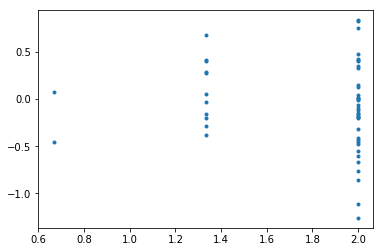

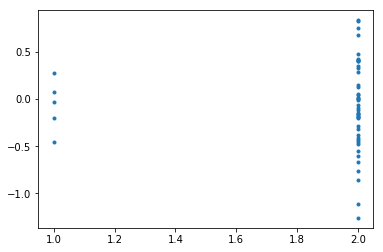

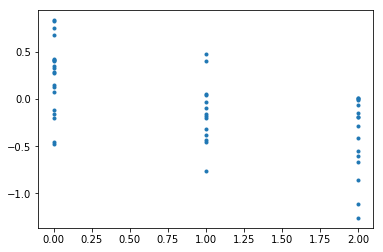

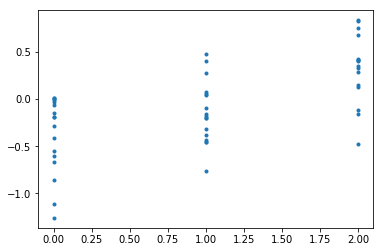

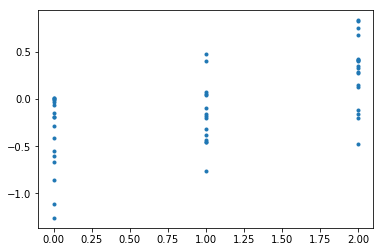

In [15]:
def get_average_improvement(df1, df2):
    ret = []
    for i, j in zip(df1,df2):
        ret.append(np.sum(j) - np.sum(i))
    return ret

improvement = get_average_improvement(bestMSE, bestCOMBO)
np.mean(improvement), np.std(improvement)


fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()


fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()


fig, ax = plt.subplots()
ax.plot(target_inD,improvement, '.')
plt.show()

fig, ax = plt.subplots()
ax.plot(target_outD,improvement, '.')
plt.show()

fig, ax = plt.subplots()
ax.plot(descendants,improvement, '.')
plt.show()

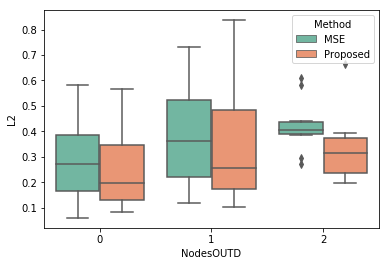

In [8]:
lst = []
for x,y in zip(qbestMSE, descendants):
    lst.append(['MSE', np.mean(x), y])
for x,y in zip(qbestCOMBO, descendants):
    lst.append(['Proposed', np.mean(x), y])


df = pd.DataFrame(lst, columns = ['Method', 'L2', 'NodesOUTD'])
ax = sns.boxplot(data=df, x = 'NodesOUTD', y = 'L2', hue = 'Method', linewidth = 1.5,palette="Set2")

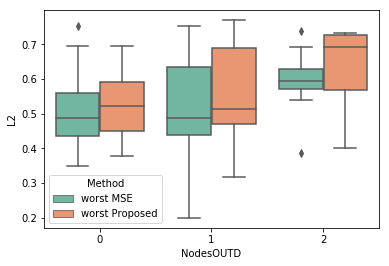

In [7]:
lst = []

for x,y in zip(qworstMSE, descendants):
    lst.append(['worst MSE', np.mean(x), y])
for x,y in zip(qworstCOMBO, descendants):
    lst.append(['worst Proposed', np.mean(x), y])


df = pd.DataFrame(lst, columns = ['Method', 'L2', 'NodesOUTD'])
ax = sns.boxplot(data=df, x = 'NodesOUTD', y = 'L2', hue = 'Method', linewidth = 1.5,palette="Set2")

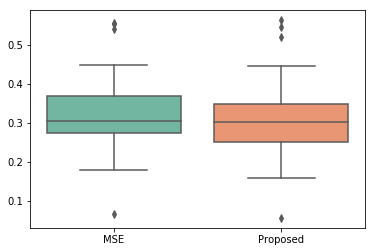

In [12]:
import seaborn as sns
val1 = []
for each in sqbestMSE:
    val1.append(np.mean(each))
val2 = []
for each in sqbestCOMBO:
    val2.append(np.mean(each))

val = []
for x, y in zip(val1, val2):
    val.append([x, y])
df = pd.DataFrame(val, columns = ['MSE', 'Proposed'])
ax = sns.boxplot(data=df, palette="Set2")

In [13]:
d = dict()
d['bestMSE'] = bestMSE
d['bestCOMBO'] = bestCOMBO
d['bestWRONG'] = bestWRONG 
d['worstMSE'] = worstMSE
d['worstCOMBO'] = worstCOMBO
d['worstWRONG'] = worstWRONG

d['qbestMSE'] = qbestMSE
d['qbestCOMBO'] = qbestCOMBO
d['qbestWRONG'] = qbestWRONG 
d['qworstMSE'] = qworstMSE
d['qworstCOMBO'] = qworstCOMBO
d['qworstWRONG'] = qworstWRONG

d['sbestMSE'] = sbestMSE
d['sbestCOMBO'] = sbestCOMBO
d['sbestWRONG'] = sbestWRONG 
d['sworstMSE'] = sworstMSE
d['sworstCOMBO'] = sworstCOMBO
d['sworstWRONG'] = sworstWRONG

d['sqbestMSE'] = sqbestMSE
d['sqbestCOMBO'] = sqbestCOMBO
d['sqbestWRONG'] = sqbestWRONG 
d['sqworstMSE'] = sqworstMSE
d['sqworstCOMBO'] = sqworstCOMBO
d['sqworstWRONG'] = sqworstWRONG

d['averageDegree']= averageDegree
d['targetDegree'] = targetDegree
d['target_inD']=  target_inD
d['target_outD'] = target_outD
d['descendants'] = descendants
d['graphDiff']= graphDiff

import pickle

with open('10node.pkl', 'wb') as handle:
    pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)


array([ 0.0034327 , -0.02559248, -0.13416377, -0.28205571,  0.05900715,
       -0.10903223,  0.2575864 ,  0.09371263, -0.30997229,  0.06285865,
       -0.04113317, -0.28456472, -0.15928204,  0.27316155,  0.56710605,
        0.55499861,  0.15069201,  0.08087676, -0.41550277,  0.06934814,
       -0.37002946,  0.20243078,  0.32295185,  0.21044946, -0.06087649,
       -0.07757568,  0.43419254, -0.16565832, -0.54071483,  0.1115466 ,
        0.00396973,  0.32194001, -0.42890713, -0.04492837, -0.08022409,
        0.30079676, -0.02563958,  0.01746376, -0.27542297,  0.24730838,
        0.22839099, -0.0525733 ,  0.06003491,  0.19578927, -0.20614404,
        0.15330721,  0.06472666, -0.03574063,  0.35898603, -0.42787733])

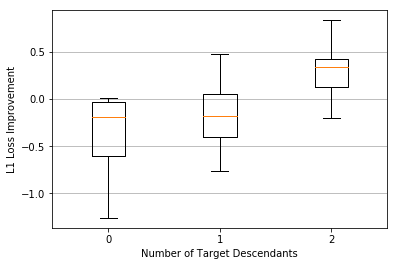

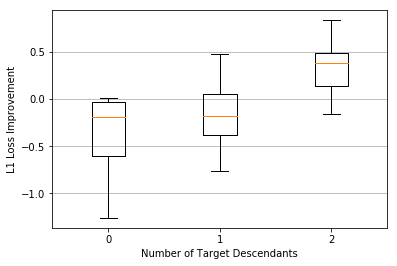

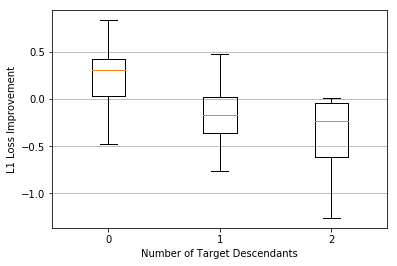

In [16]:
def box_plots(X,Y):
    box = []
    for i in np.unique(X):
        box.append([])
    for x,y in zip(X, Y):
        box[x].append(y)
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.yaxis.grid(True)
    ax.set_xlabel("Number of Target Descendants")
    ax.set_ylabel("L1 Loss Improvement")
    bp = ax.boxplot(box, showfliers=False, labels = ['0', '1', '2'])
    
box_plots(descendants, improvement)
box_plots(target_outD, improvement)
box_plots(target_inD, improvement)

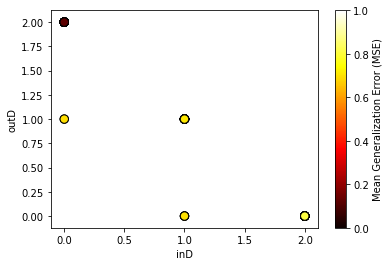

In [45]:
def heat_plot(x,y,z, xlab = 'Mean', ylab = 'Variance', zlab= 'Mean Generalization Error (MSE)', clim_low = 0, clim_high = 1):
    fig, ax = plt.subplots()

    cax = ax.scatter(x, y, c=z, s=70, edgecolor='black', cmap = 'hot')
    cax.set_clim(clim_low, clim_high)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    #plt.colorbar(cax)
    cbar = plt.colorbar(cax)
    cbar.set_label(zlab)
    plt.show()
    

heat_plot(target_outD, target_inD, normalize(improvement), xlab = 'inD', ylab='outD')

In [ ]:
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

In [ ]:
improvement
fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()

improvement
fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()

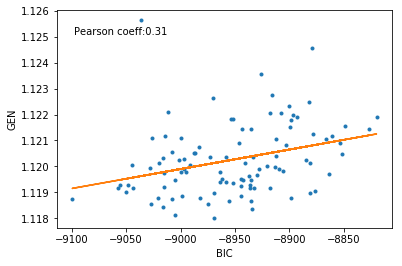

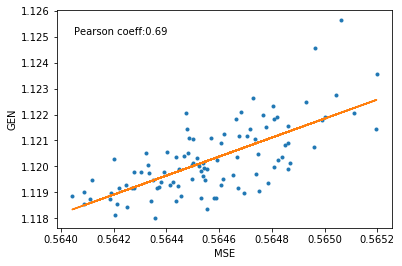

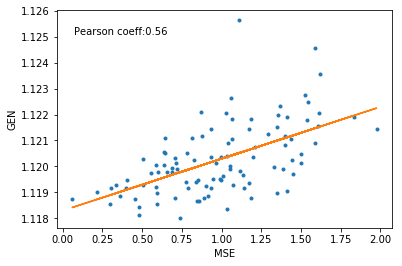

In [11]:
fig, ax = plt.subplots()
b,m = polyfit(proposed,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(proposed,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(proposed,generalization, '.')
plt.plot(proposed, b + m * np.array(proposed), '-')
ax.set_xlabel("BIC")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
b,m = polyfit(metrics,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(metrics,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(metrics,generalization, '.')
plt.plot(metrics, b + m * np.array(metrics), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


total = normalize(metrics) + normalize(proposed)
fig, ax = plt.subplots()
b,m = polyfit(total,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(total,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(total,generalization, '.')
plt.plot(total, b + m * np.array(total), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


In [ ]:
nbest = 10
final = pd.DataFrame(np.stack((metrics, proposed, total, generalization), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization']))
print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization']))
print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization']))